# Classification Test #3

- [Generating labels](#Generating-labels)
- [Training the SDM](#Training-the-SDM)
- [Testing with high noise](#Testing-with-high-noise)
- [Testing with low noise](#Testing-with-low-noise)
- [Testing with no noise](#Testing-with-no-noise)

In [1]:
import sdm as sdmlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import urllib, cStringIO
import random
from IPython.core.display import display, Image as IPythonImage
%matplotlib inline

In [2]:
width = 31
height = 32
noise_flip = True

In [3]:
def gen_img(letter='A'):
    img = Image.new('RGBA', (width, height), (255, 255, 255))
    font = ImageFont.truetype('Arial.ttf', 30)
    draw = ImageDraw.Draw(img)
    w, h = draw.textsize(letter, font=font)
    top = (height-w)//2
    left = (width-h)//2 if h <= 30 else 30-2-h
    draw.text((top, left), letter, (0, 0, 0), font=font)
    return img

In [4]:
def gen_noise_add(img, p=0.15, flip=False):
    img2 = img.copy()
    draw = ImageDraw.Draw(img2)
    for py in xrange(height):
        for px in xrange(width):
            if random.random() < p:
                if flip:
                    pixel = img.getpixel((px, py))
                    value = sum([int(x/255+0.5) for x in pixel[:3]])//3
                    assert value == 0 or value == 1
                    value = (1 - value)*255
                    draw.point((px, py), fill=(value, value, value))
                else:
                    draw.point((px, py), fill=(0, 0, 0))
    return img2

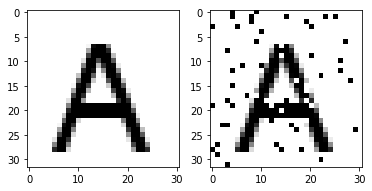

In [5]:
img = gen_img(letter='A');
img2 = gen_noise_add(img, p=0.05, flip=noise_flip)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img2);

In [6]:
def to_bitstring(img):
    v = []
    bs = sdmlib.Bitstring.init_ones(1000)
    for py in xrange(height):
        for px in xrange(width):
            pixel = img.getpixel((px, py))
            value = sum([int(x/255+0.5) for x in pixel[:3]])//3
            assert value == 0 or value == 1
            idx = px+width*py
            assert idx >= 0 and idx < 1000, 'Ops {} {} {}'.format(x, y, idx)
            bs.set_bit(idx, value)
            v.append(value)
    v2 = [bs.get_bit(i) for i in xrange(height*width)]
    assert v == v2
    return bs

In [7]:
def to_img(bs):
    img = Image.new('RGBA', (30, 30), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    for py in xrange(height):
        for px in xrange(width):
            idx = px+width*py
            assert idx >= 0 and idx < 1000, 'Ops {} {} {}'.format(x, y, idx)
            x = 255*bs.get_bit(idx)
            draw.point((px, py), fill=(x, x, x))
    return img

In [8]:
bits = 1000
sample = 1000000
scanner_type = sdmlib.SDM_SCANNER_THREAD

In [9]:
address_space = sdmlib.AddressSpace.init_from_b64_file('sdm-letters.as')

In [10]:
counter = sdmlib.Counter.create_file('sdm-classification-3', bits, sample)
sdm = sdmlib.SDM(address_space, counter, 451, scanner_type)

In [11]:
def fill_memory(letter, label_bs, p=0.1, n=100):
    cols = 15
    rows = n//cols + 1
    plt.figure(figsize=(20,10))
    for i in xrange(n):
        img = gen_img(letter=letter);
        img2 = gen_noise_add(img, p=p, flip=noise_flip)
        #display(img2)
        plt.subplot(rows, cols, i+1)
        plt.imshow(img2)
        bs = to_bitstring(img2)
        sdm.write(bs, label_bs)
    plt.show()

In [12]:
def read(letter, n=6, p=0.2, radius=None):
    img = gen_img(letter=letter);
    img2 = gen_noise_add(img, p=p, flip=noise_flip)
    plt.imshow(img2)
    
    bs2 = to_bitstring(img2)
    bs3 = sdm.read(bs2, radius=radius)
    
    label = min(label_to_bs.items(), key=lambda v: bs3.distance_to(v[1]))
    return label[0]

In [13]:
def iter_read(letter, n=10, p=0.2):
    cols = 15
    rows = n//cols + 1
    plt.figure(figsize=(20,10))
    
    wrong = 0
    correct = 0
    answers = []
    for i in xrange(n):
        plt.subplot(rows, cols, i+1)
        y = read(x, p=p)
        answers.append(y)
        if x == y:
            correct += 1
        else:
            wrong += 1
    plt.show()
    print '!! {} correct={:2d} wrong={:2d} answers={}'.format(x, correct, wrong, answers)

## Generating labels

In [14]:
labels = list('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789')
label_to_bs = {}
for x in labels:
    label_to_bs[x] = sdmlib.Bitstring.init_random(1000)

## Training the SDM

Training for label A...


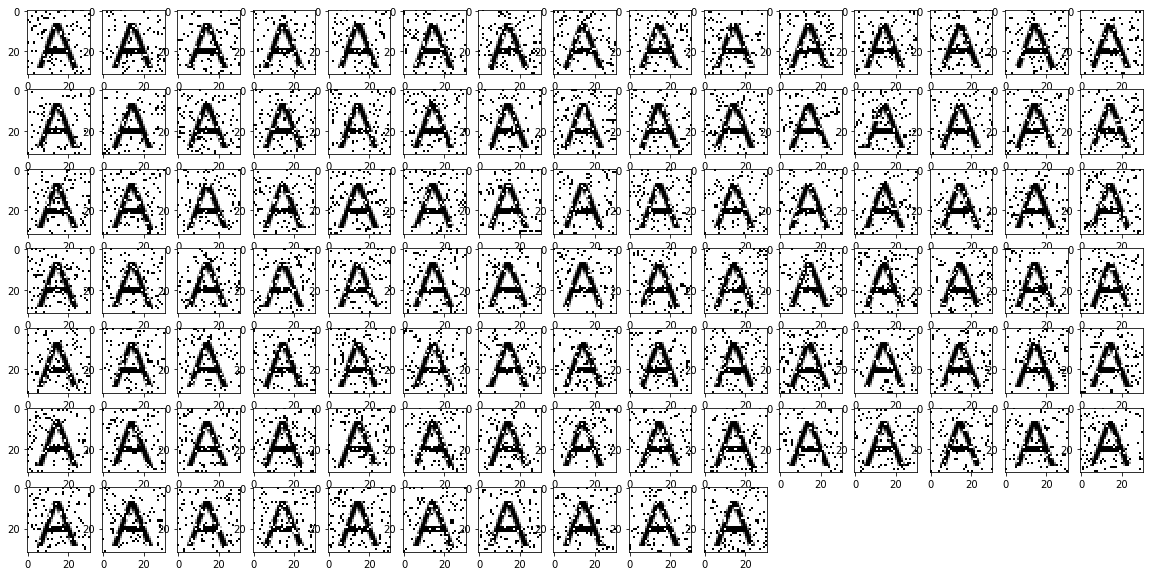

Training for label B...


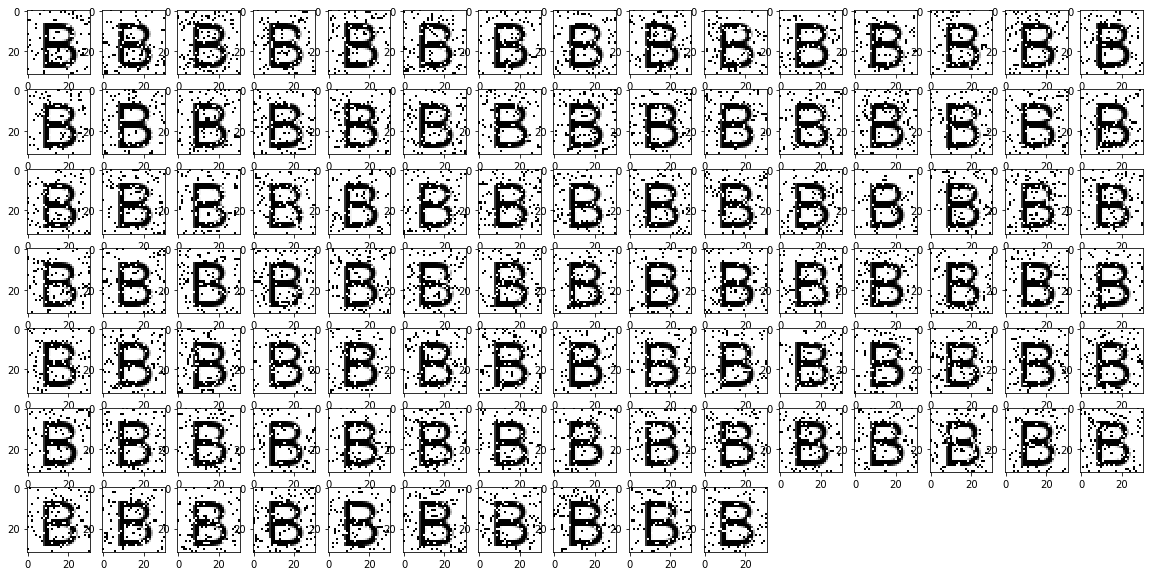

Training for label C...


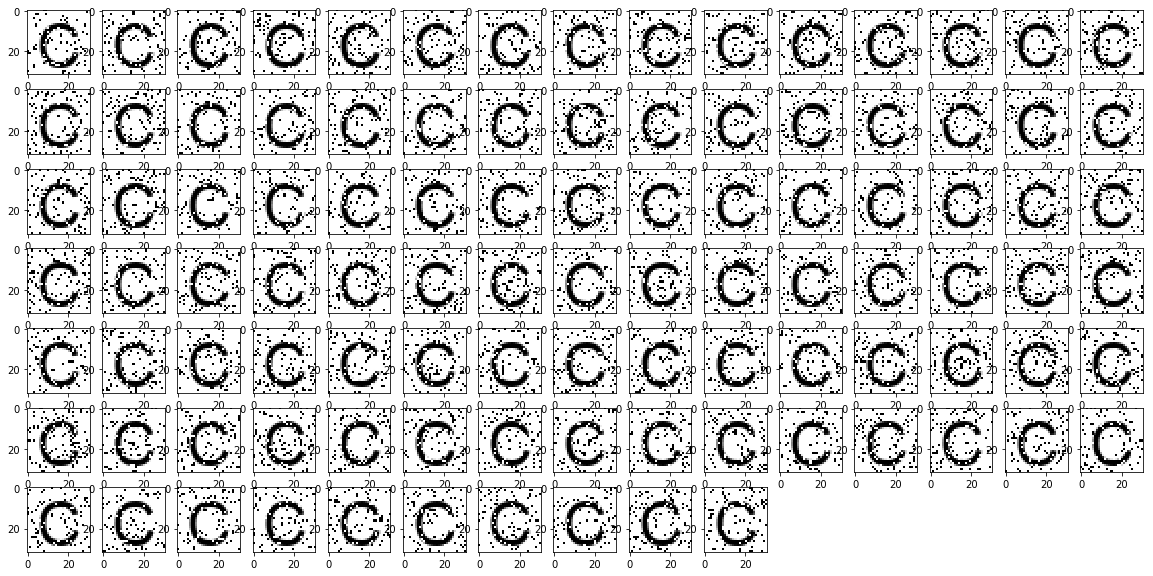

Training for label D...


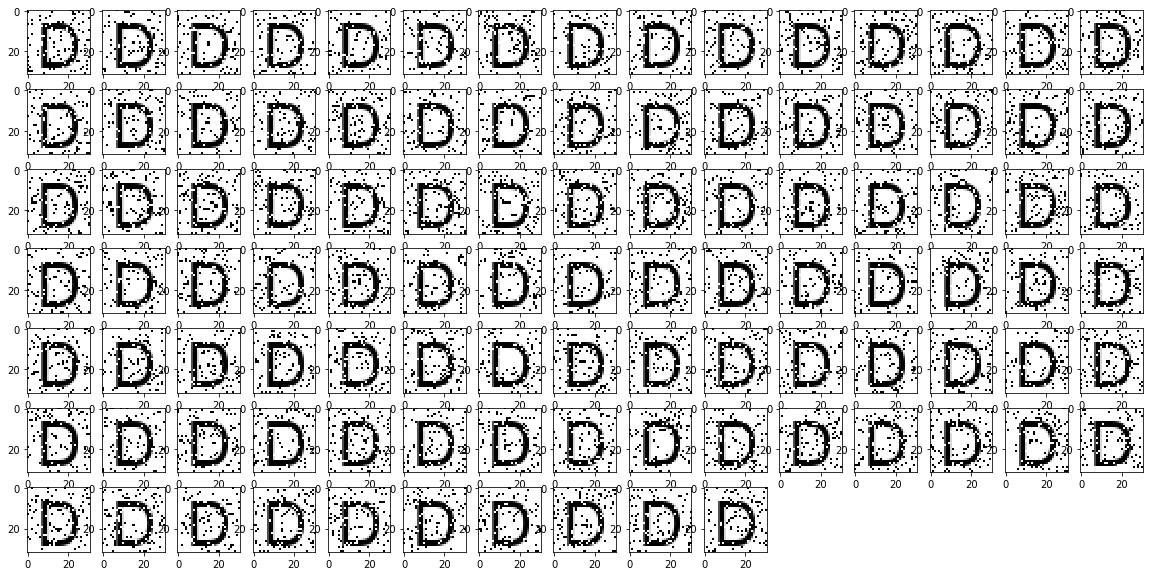

Training for label E...


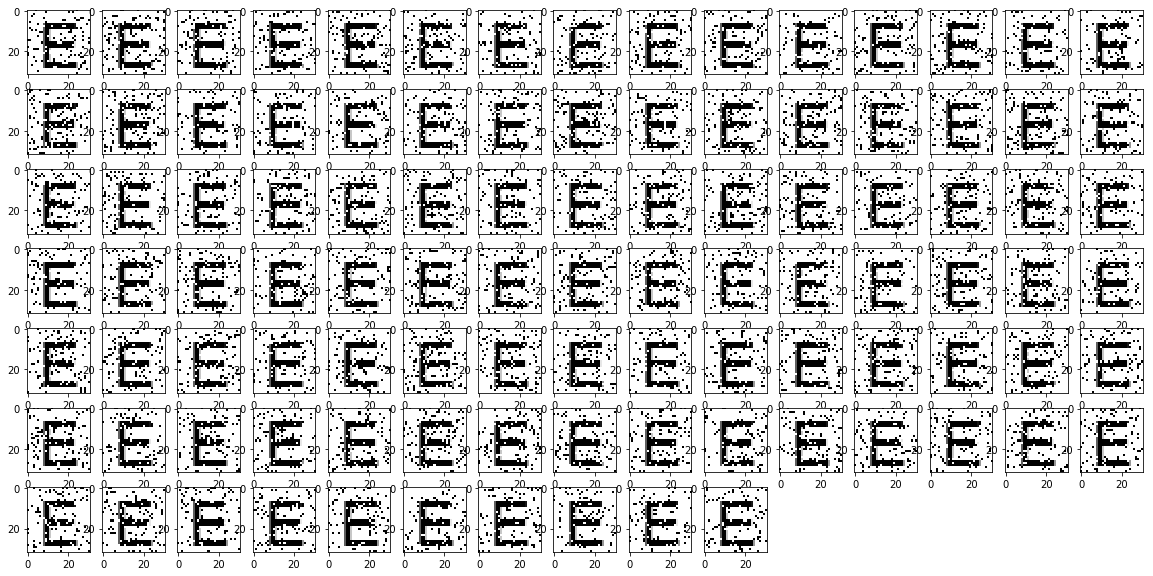

Training for label F...


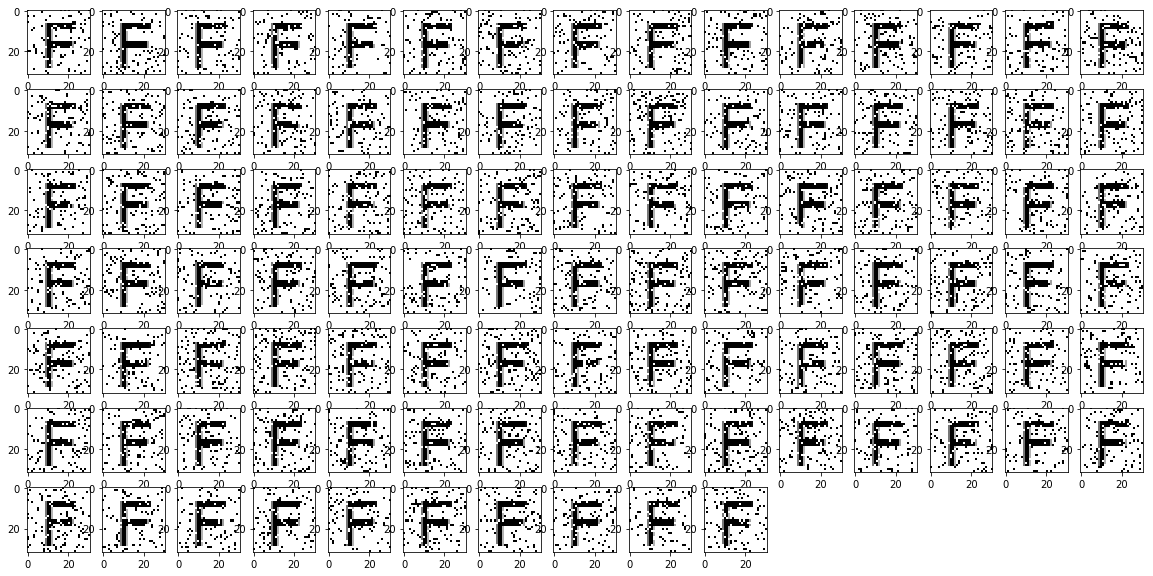

Training for label G...


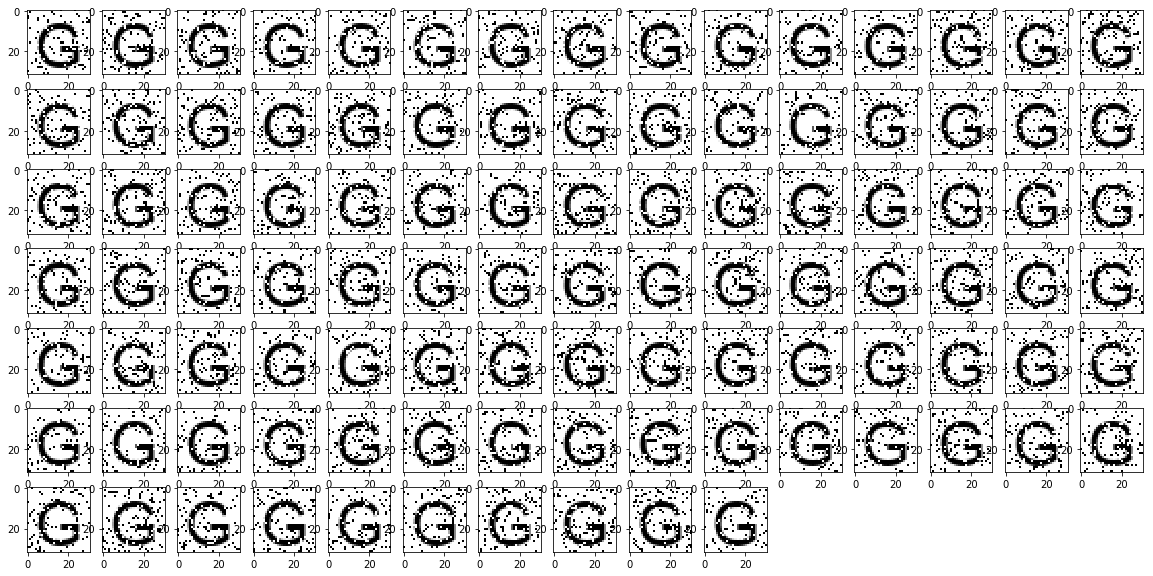

Training for label H...


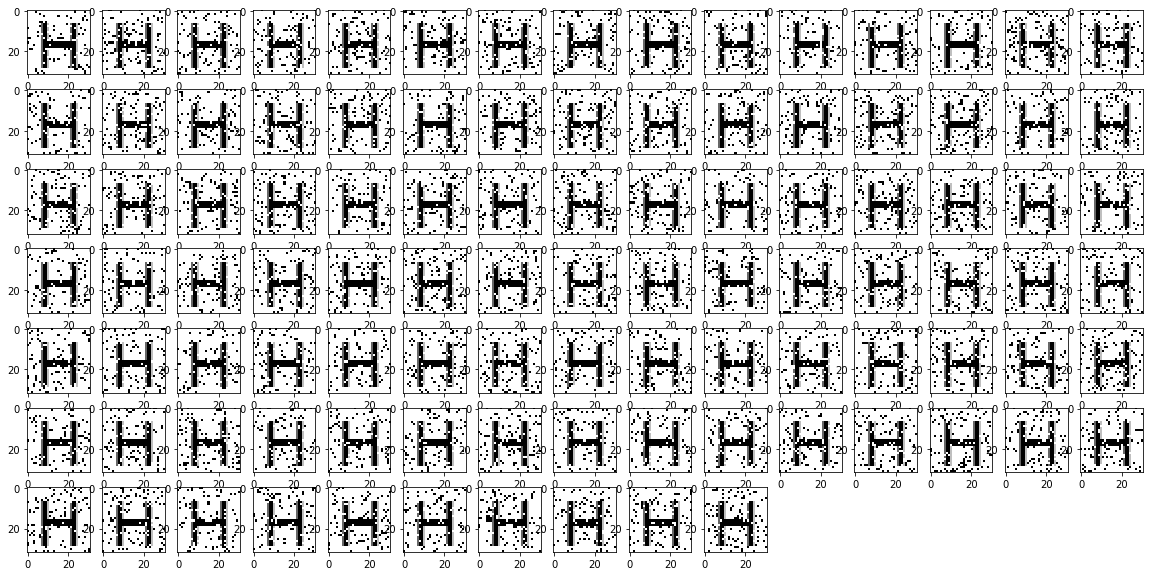

Training for label I...


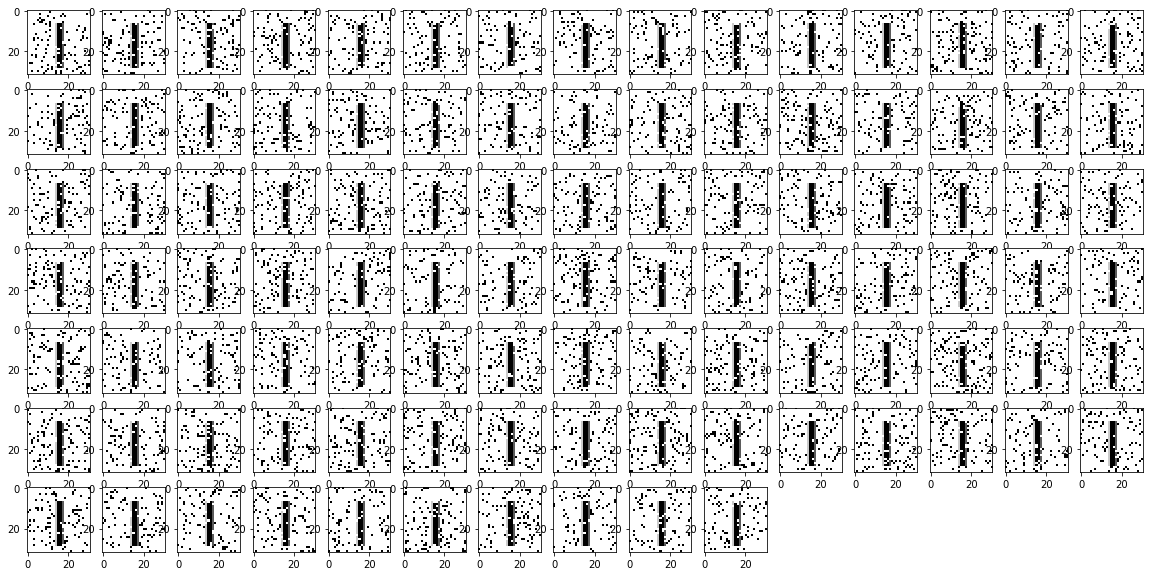

Training for label J...


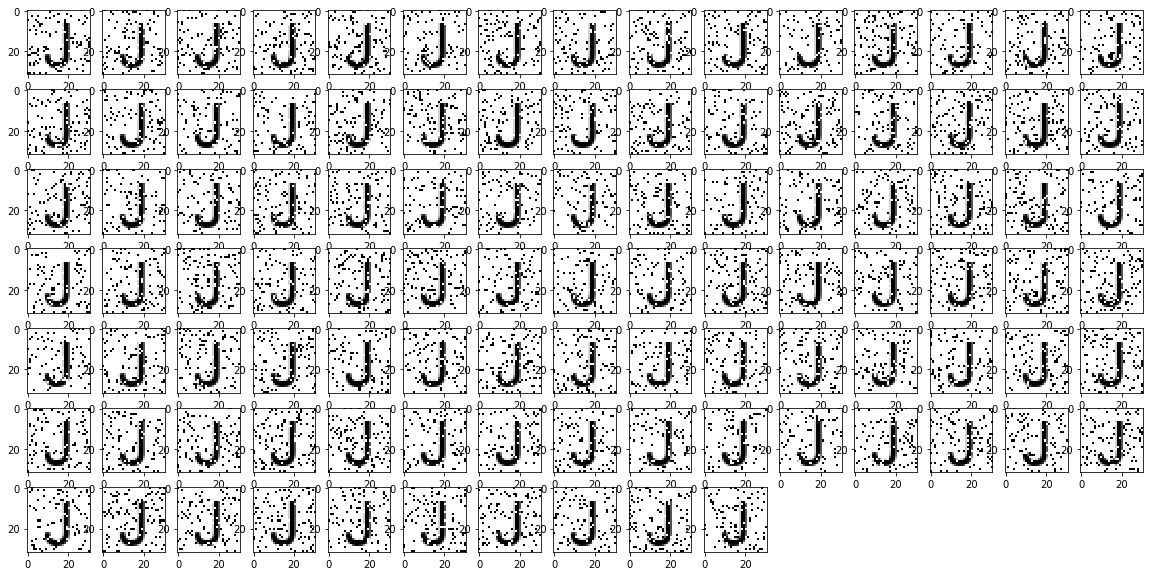

Training for label K...


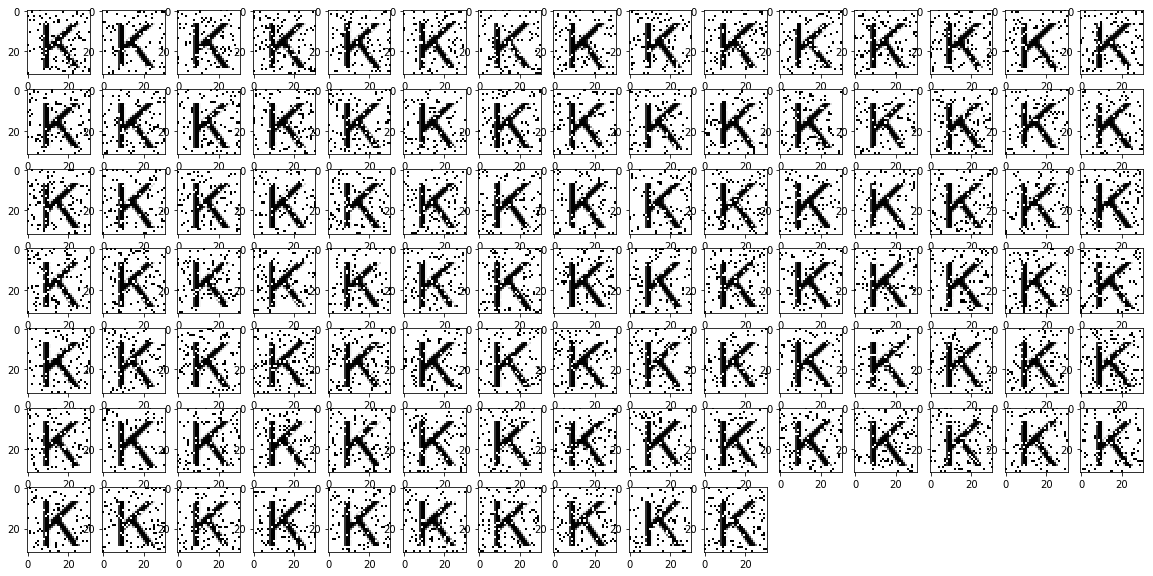

Training for label L...


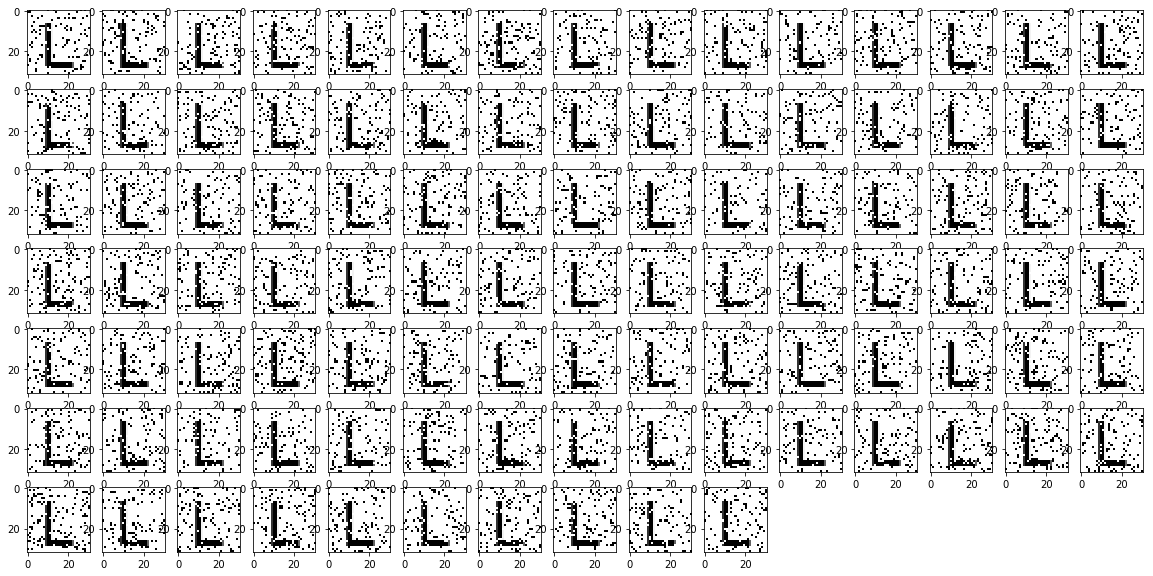

Training for label M...


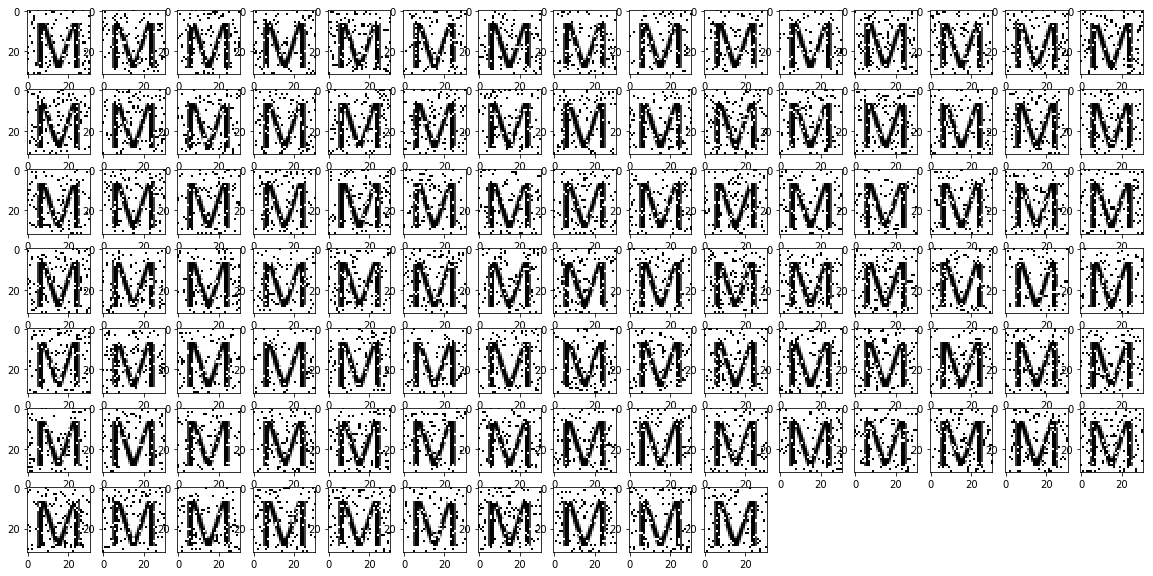

Training for label N...


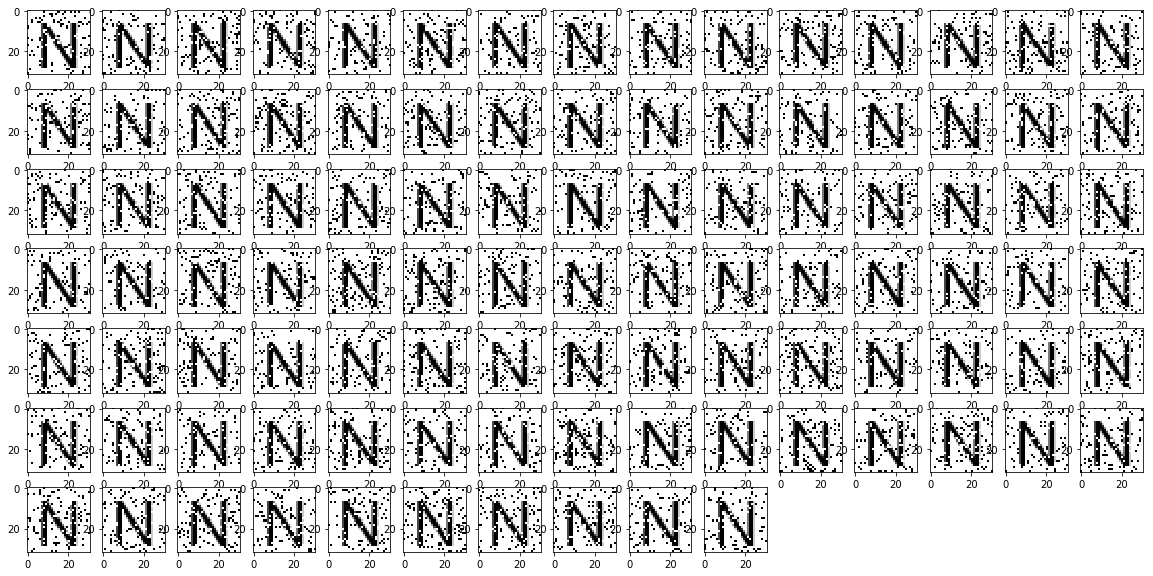

Training for label O...


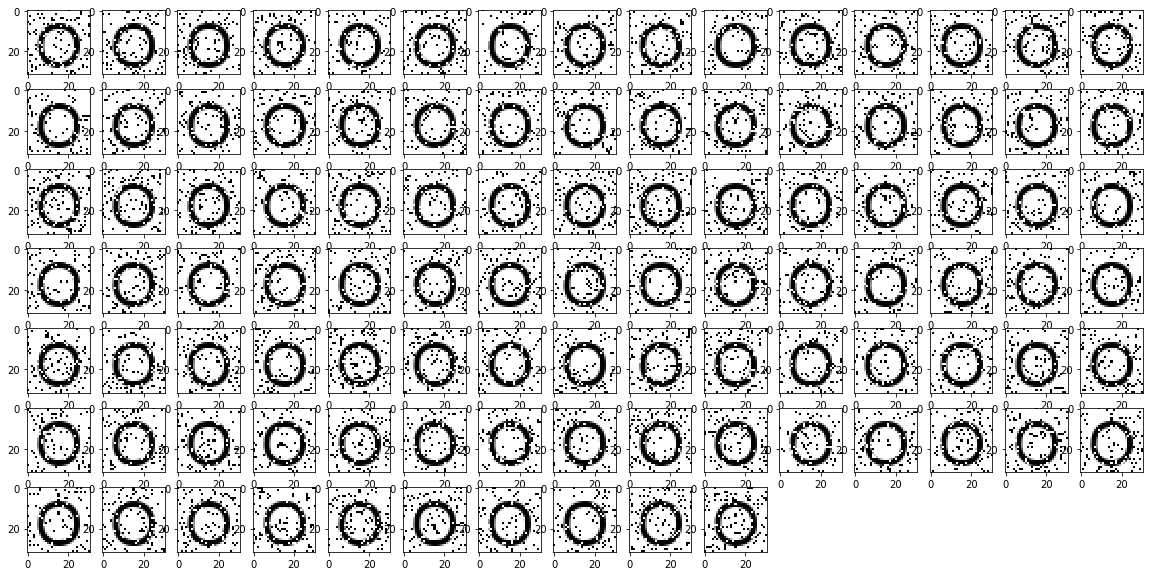

Training for label P...


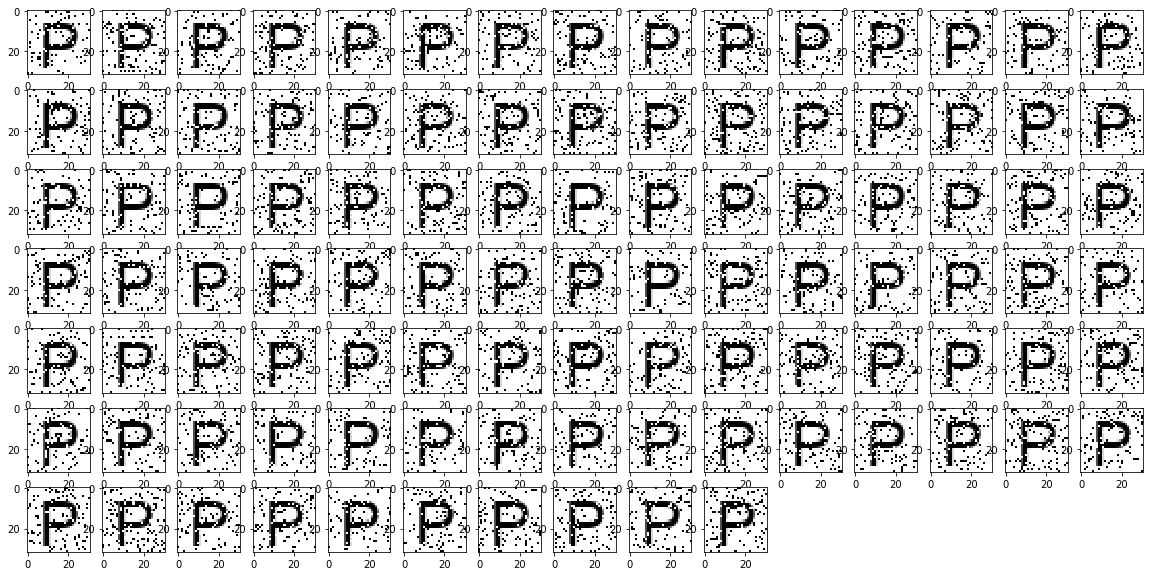

Training for label Q...


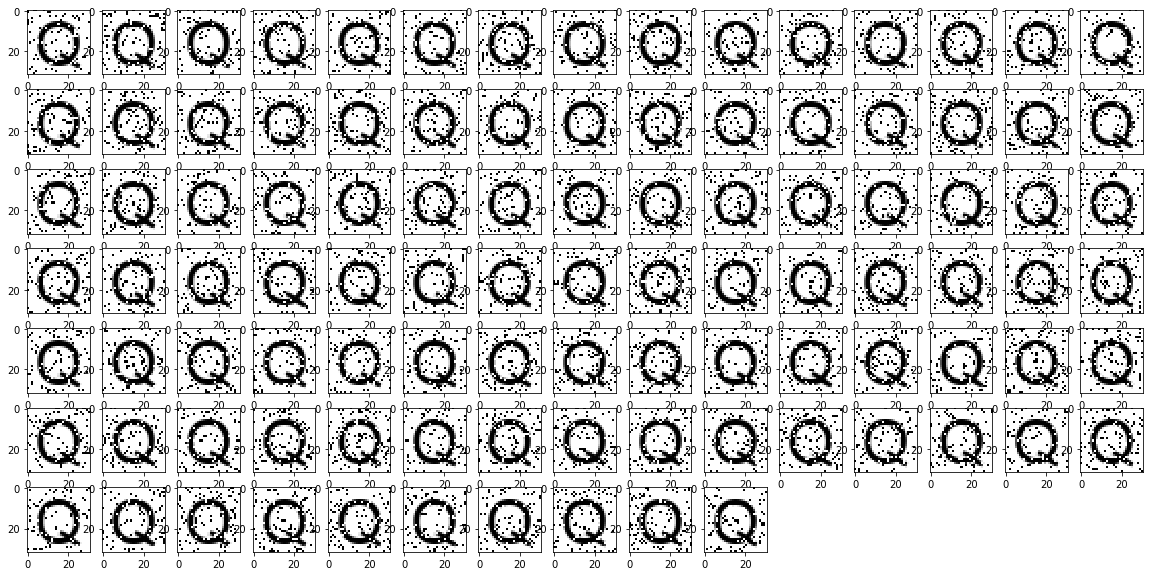

Training for label R...


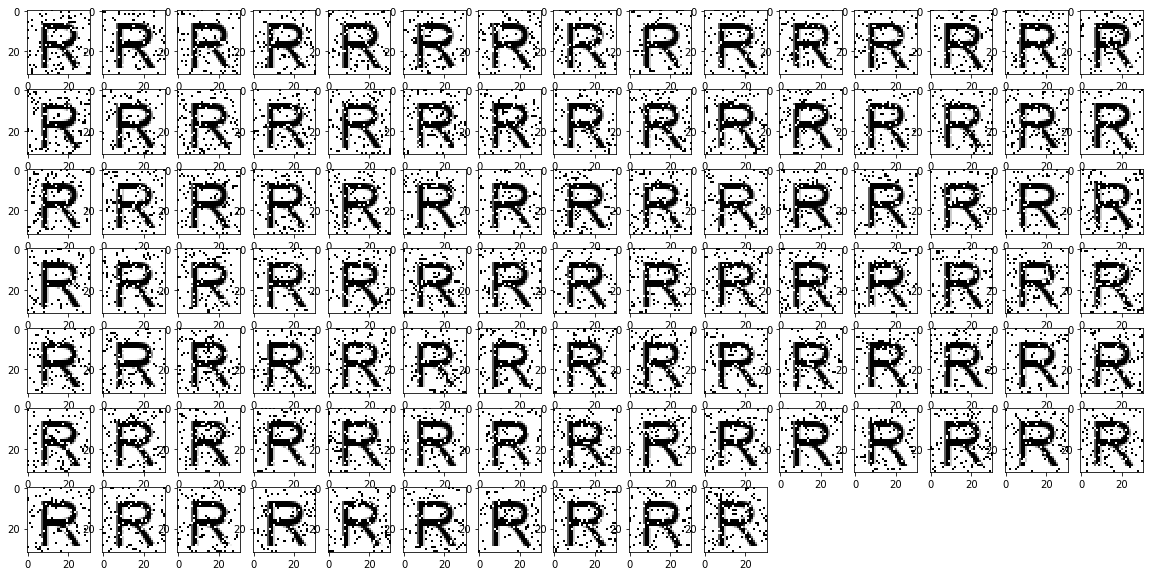

Training for label S...


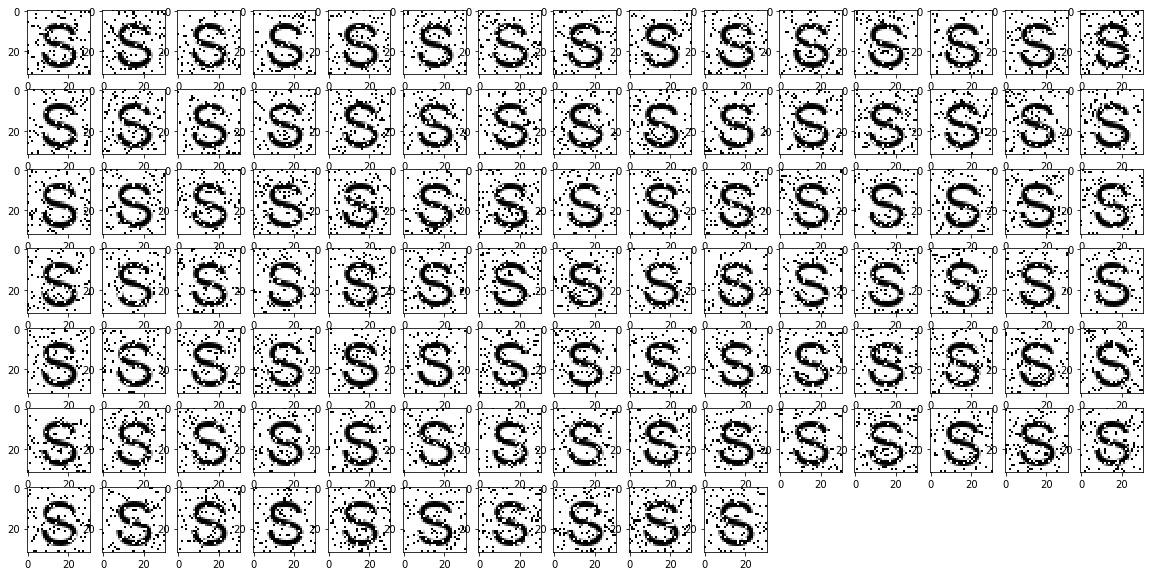

Training for label T...


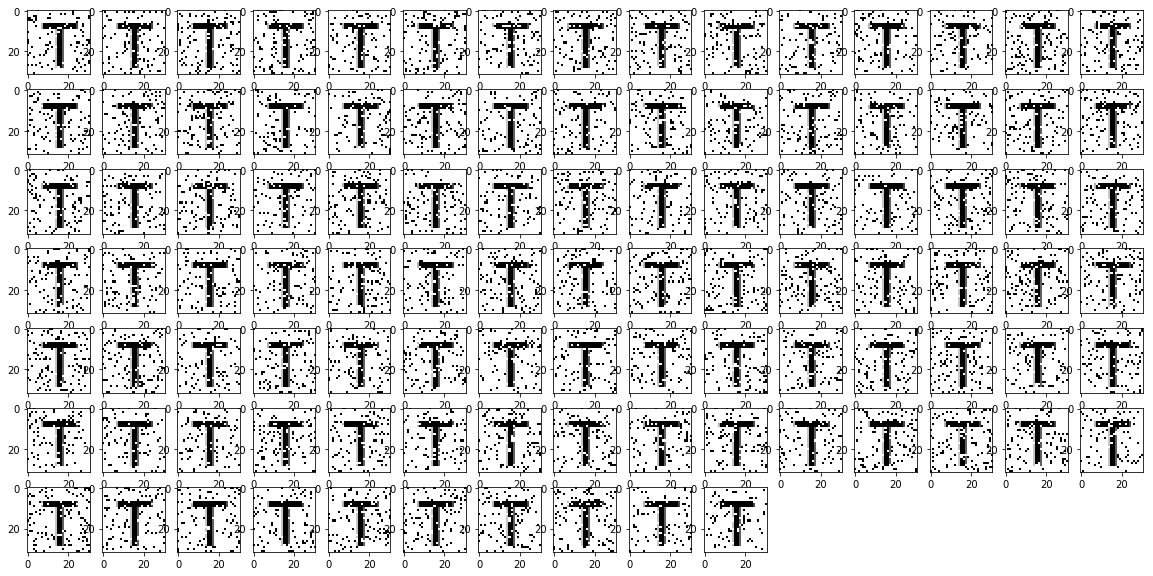

Training for label U...


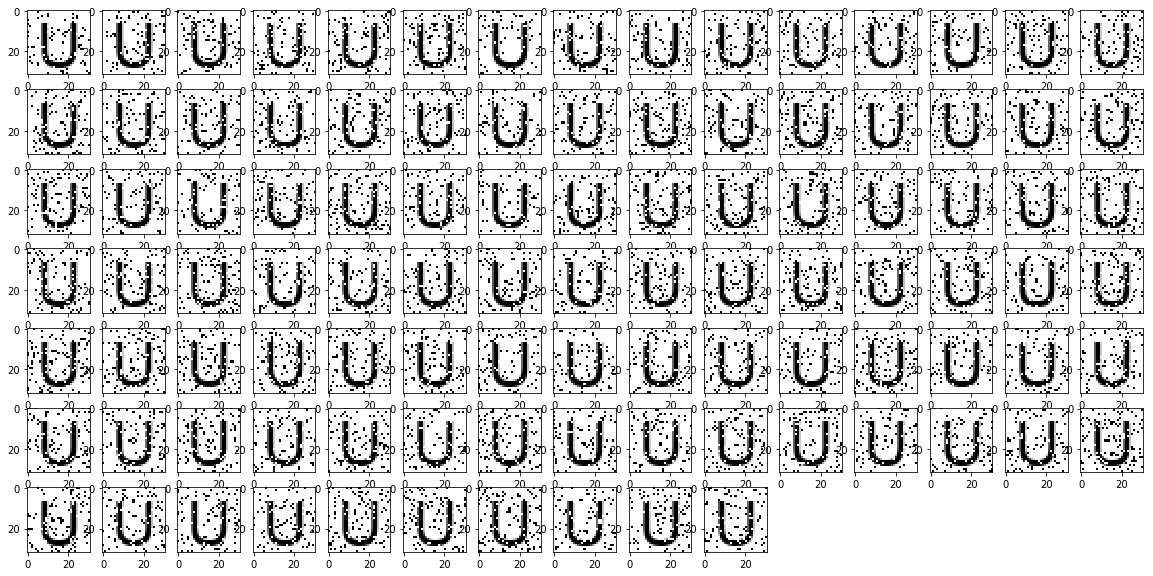

Training for label V...


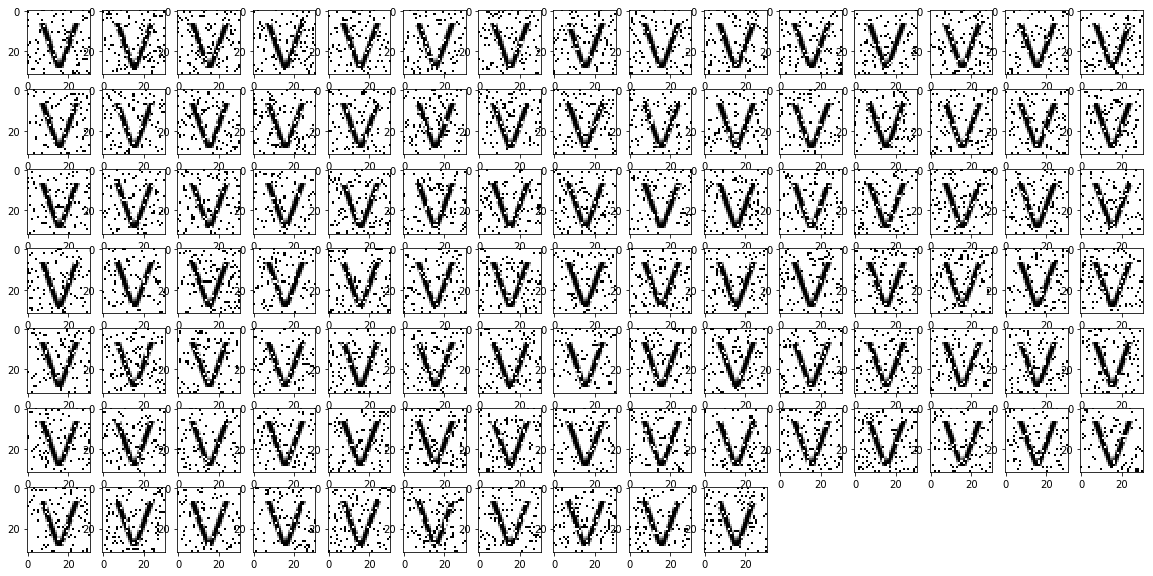

Training for label W...


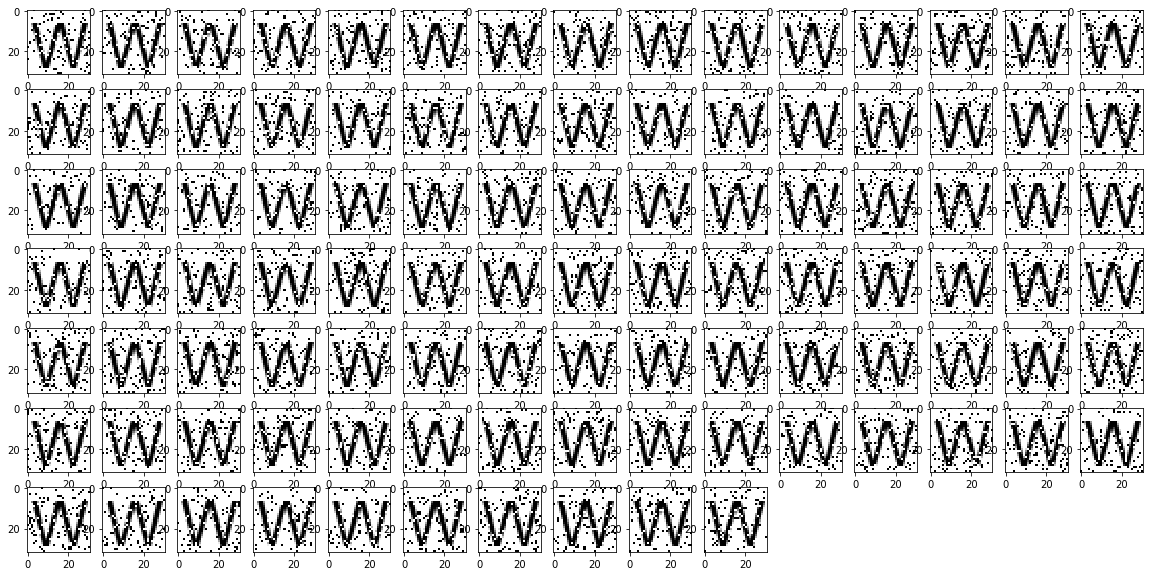

Training for label X...


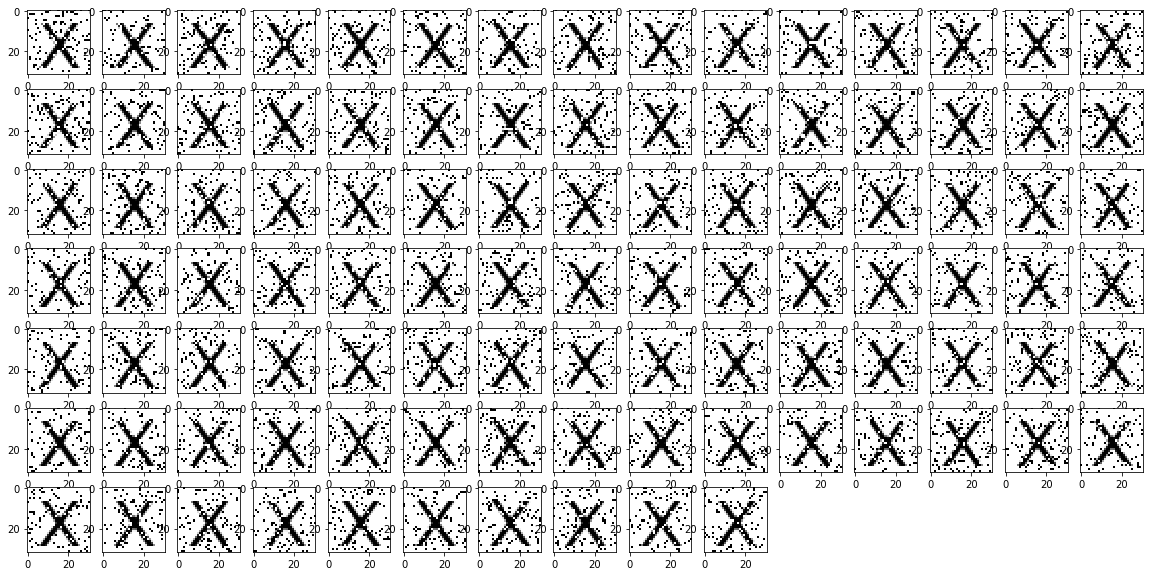

Training for label Y...


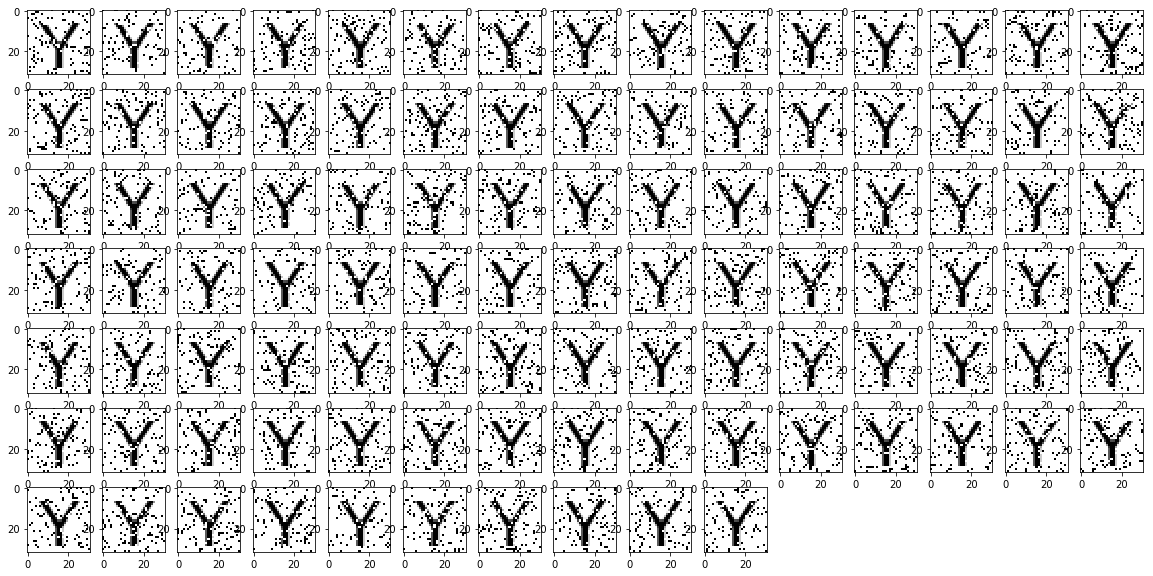

Training for label Z...


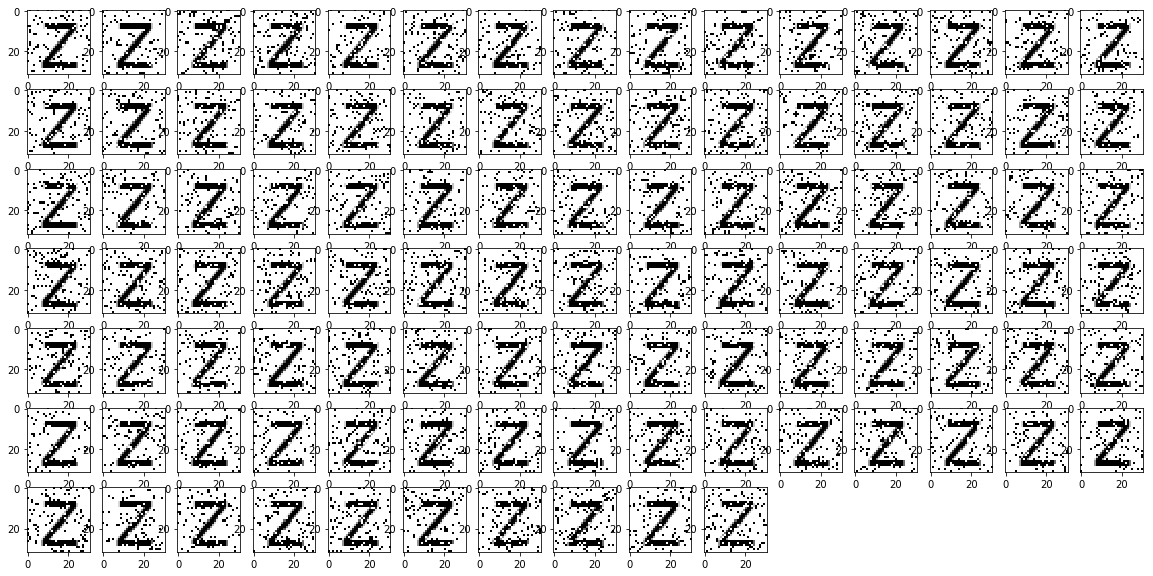

Training for label a...


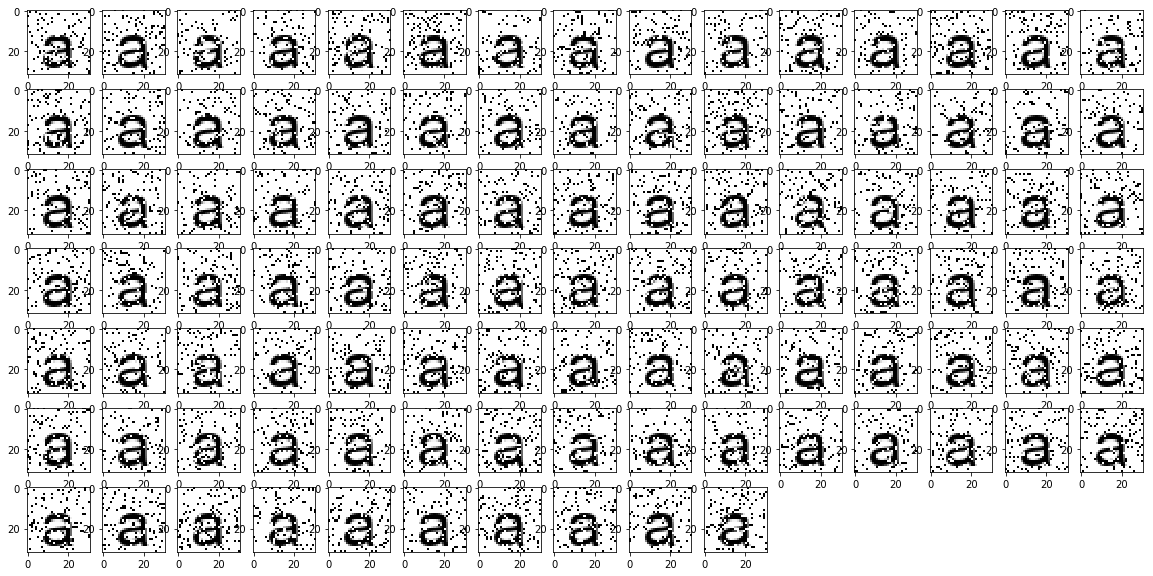

Training for label b...


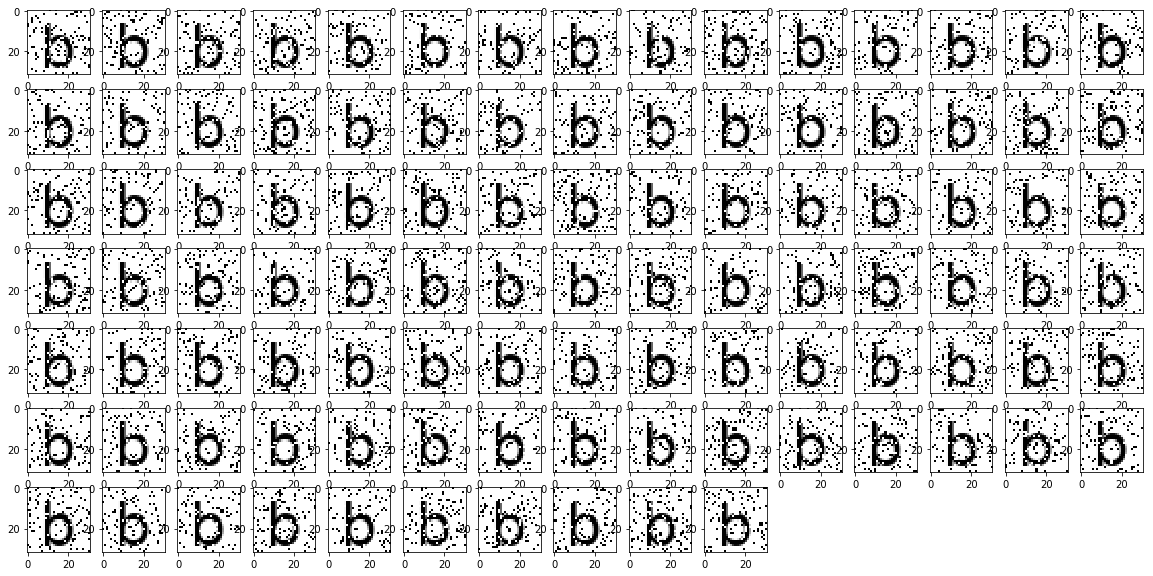

Training for label c...


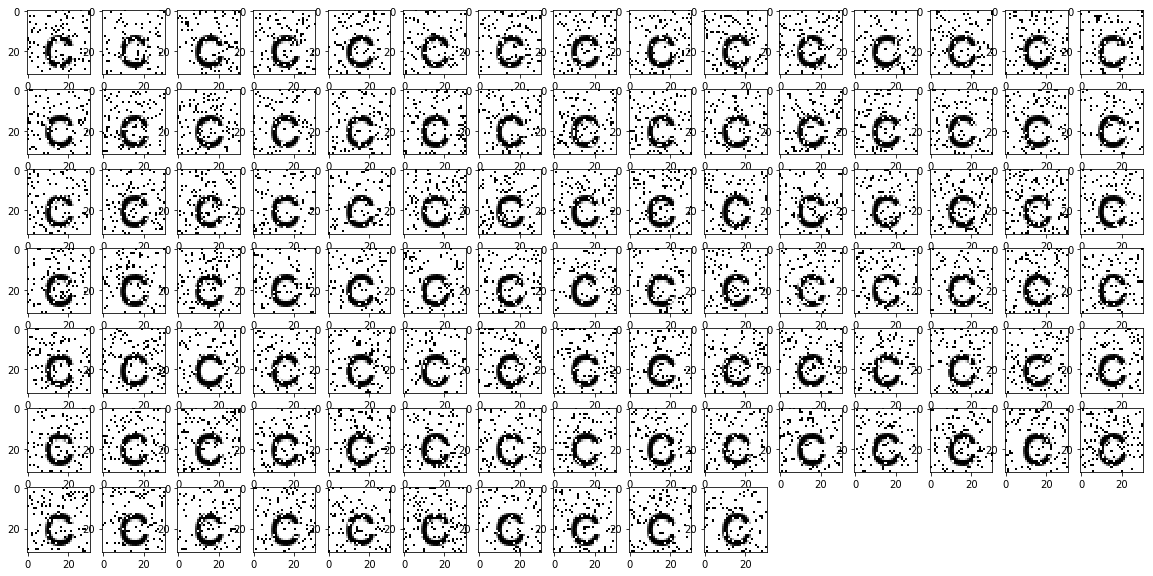

Training for label d...


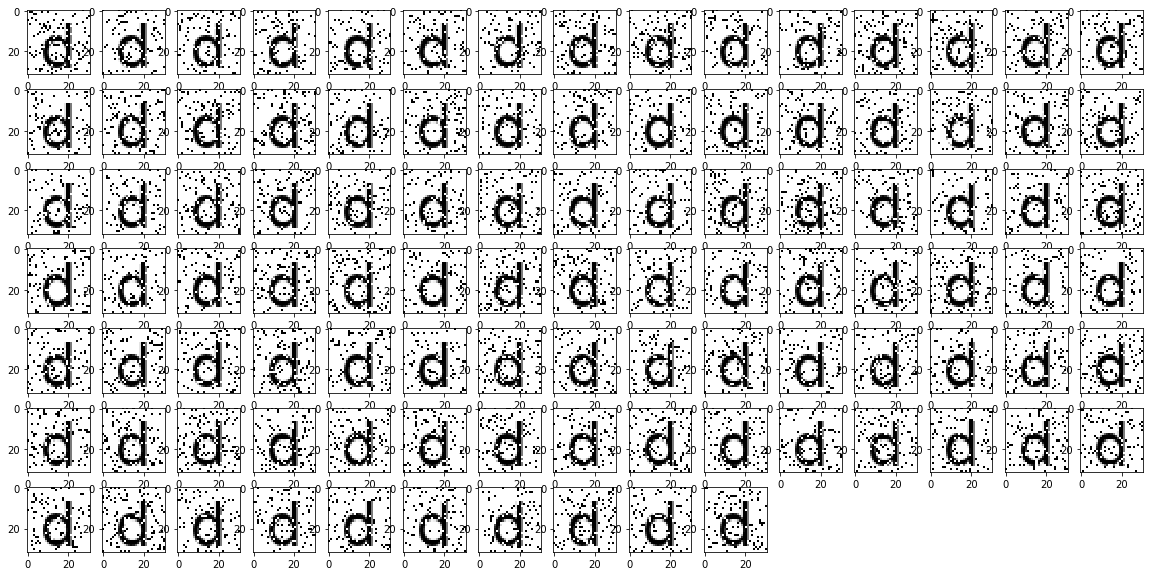

Training for label e...


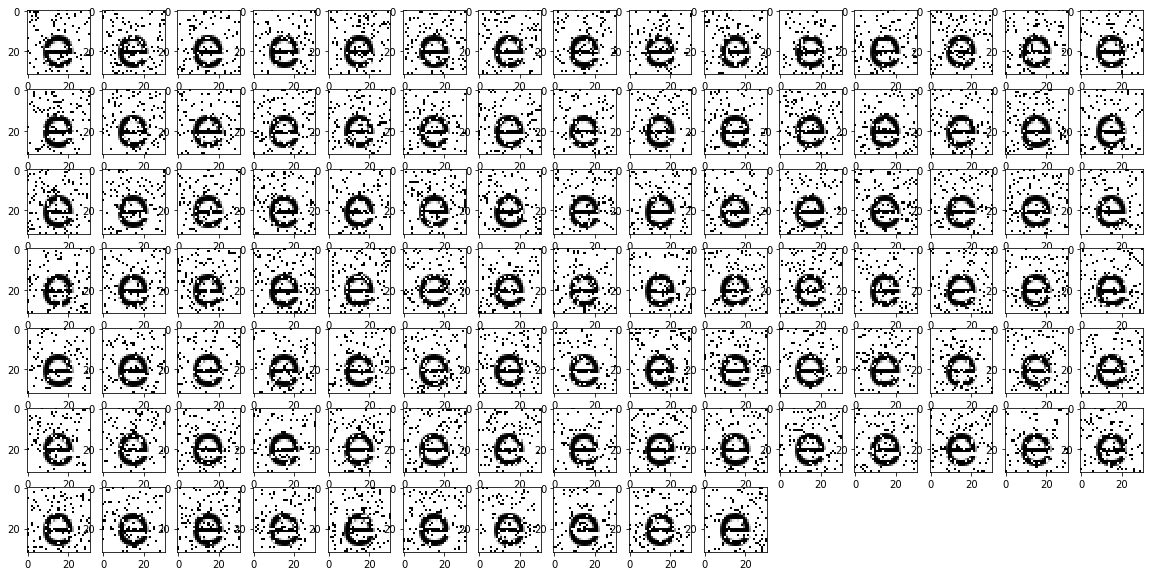

Training for label f...


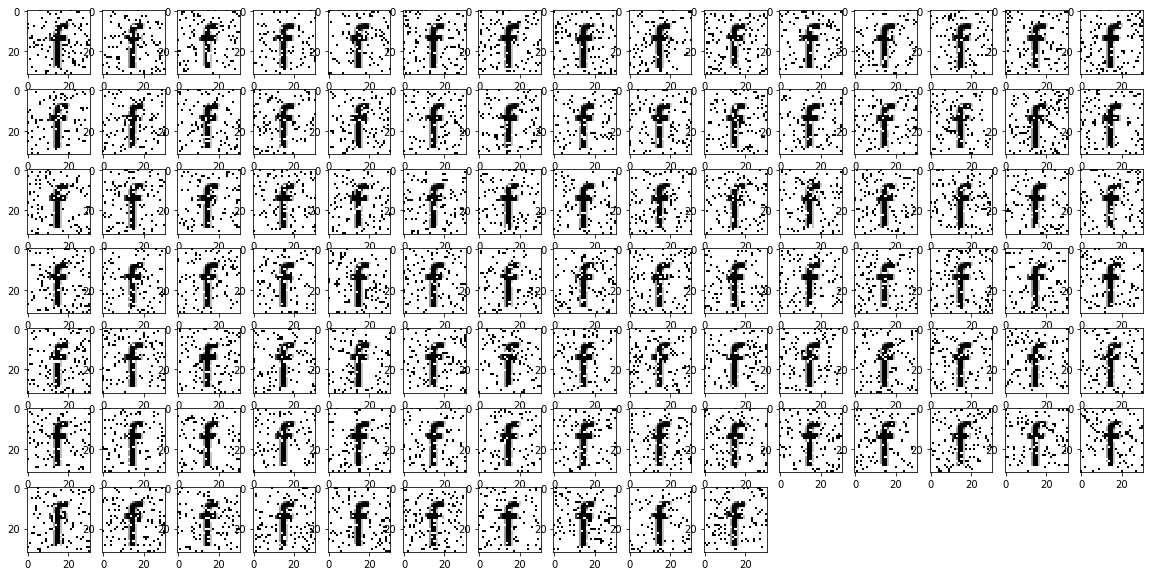

Training for label g...


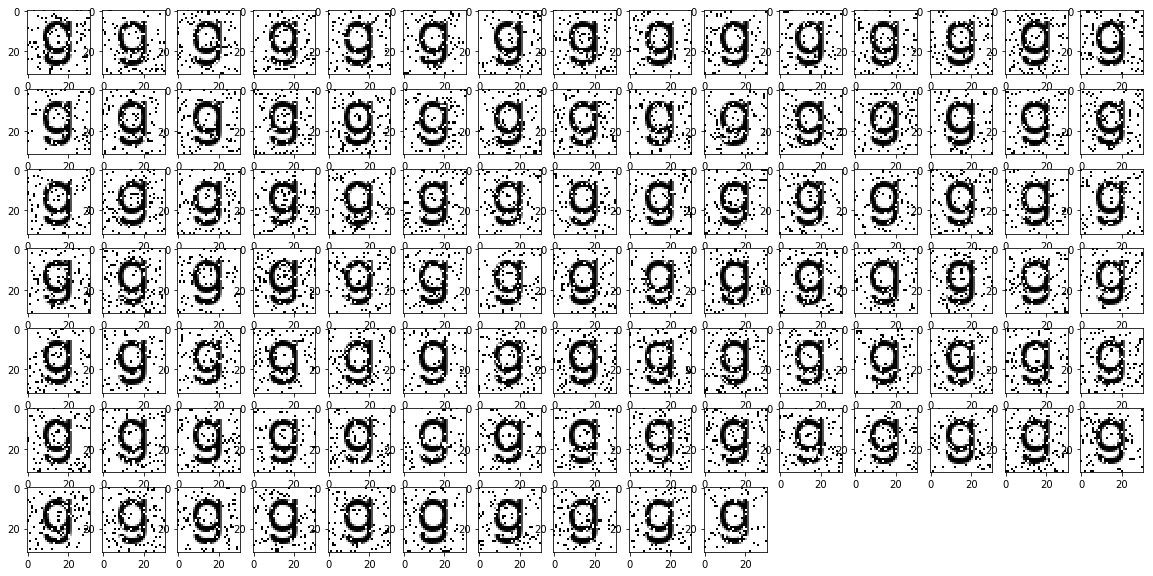

Training for label h...


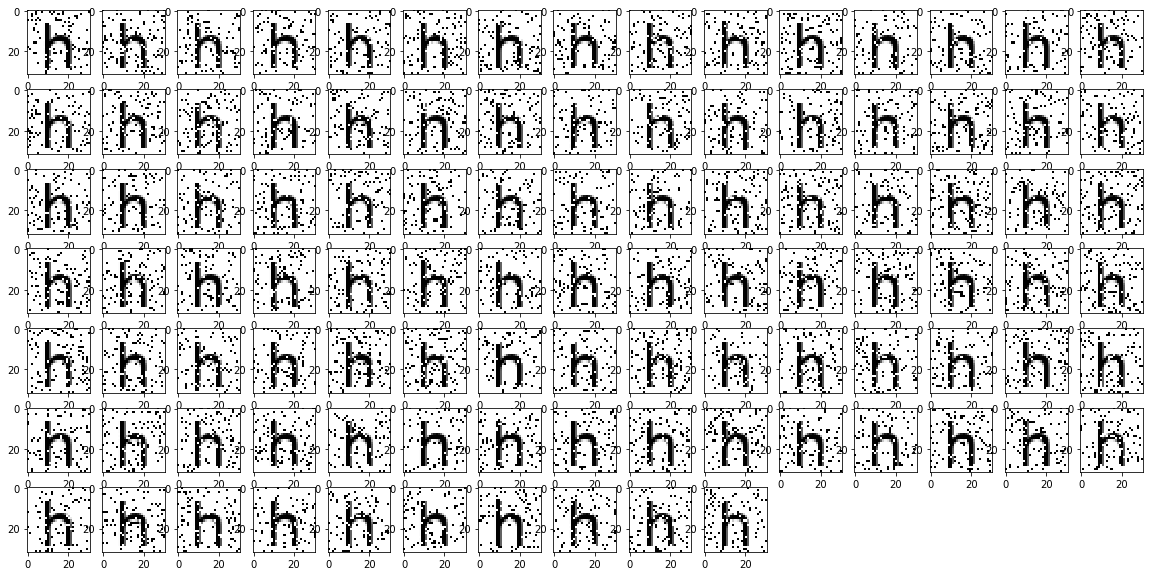

Training for label i...


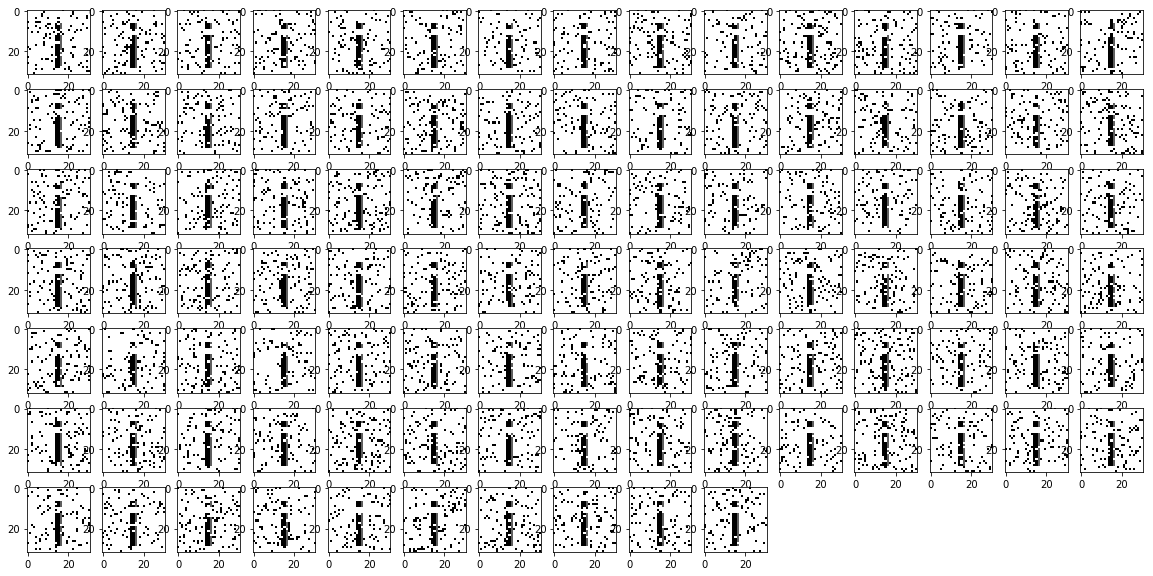

Training for label j...


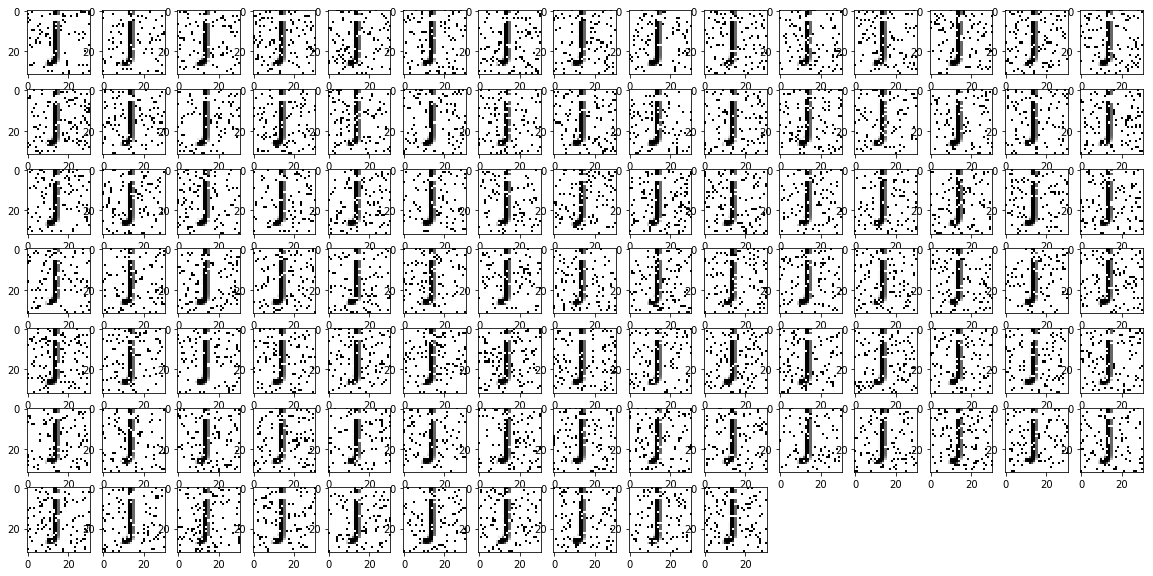

Training for label k...


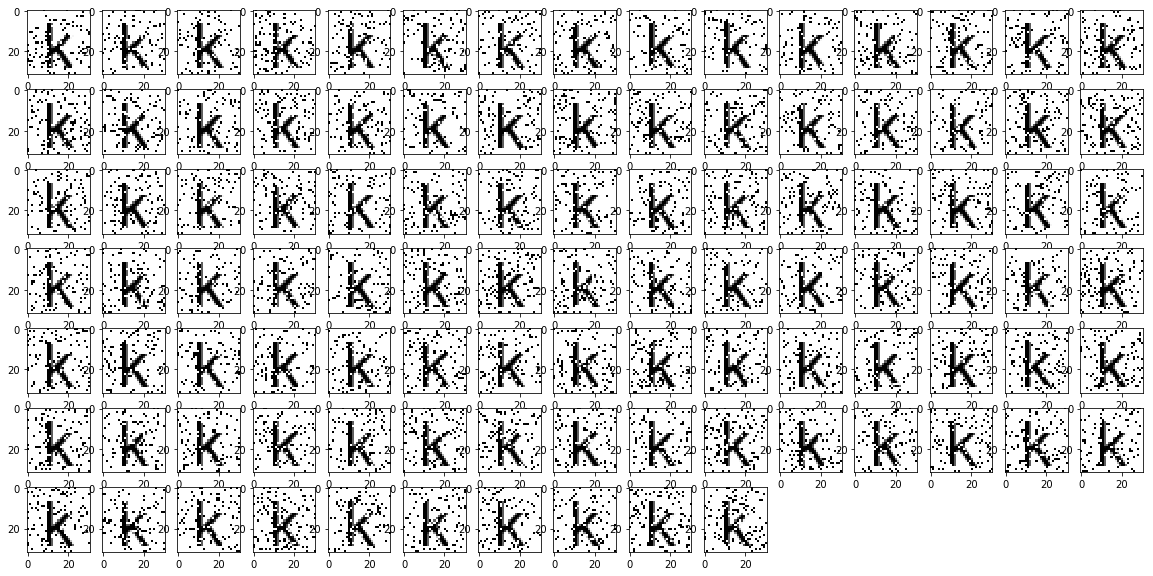

Training for label l...


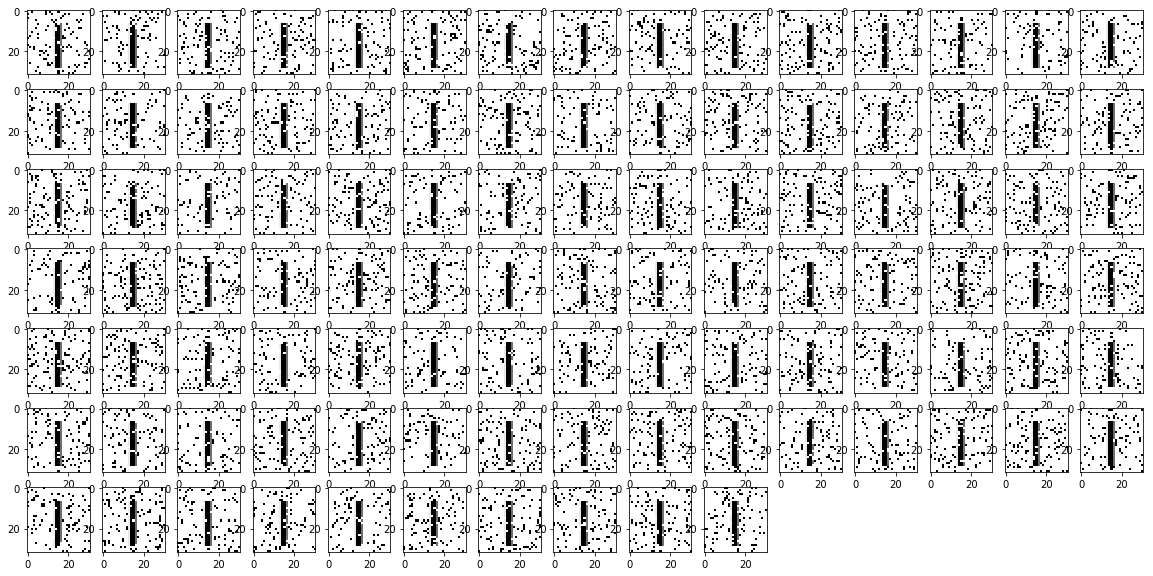

Training for label m...


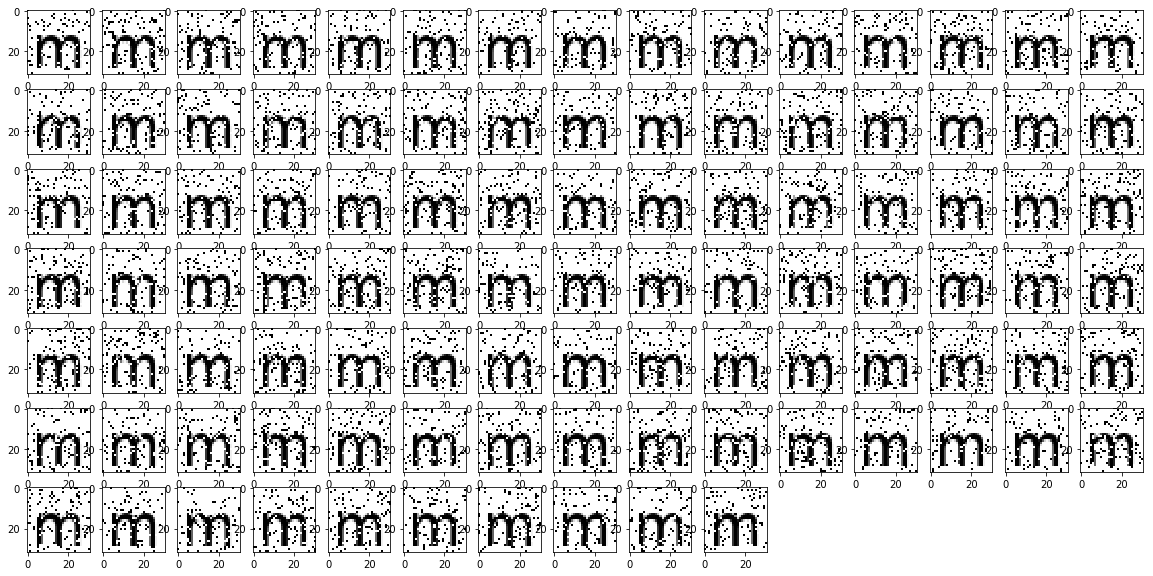

Training for label n...


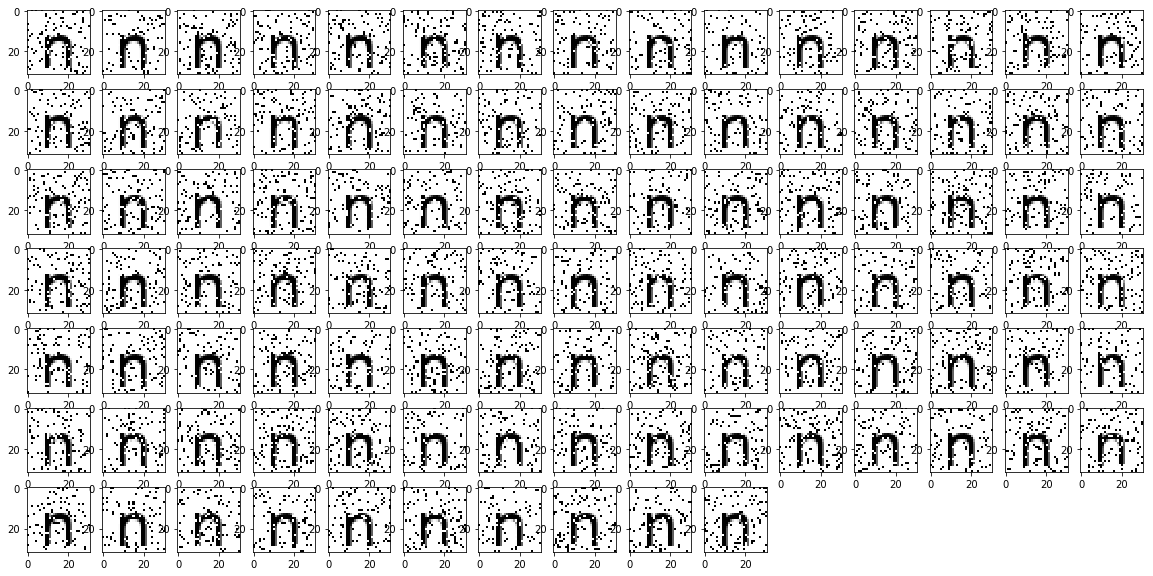

Training for label o...


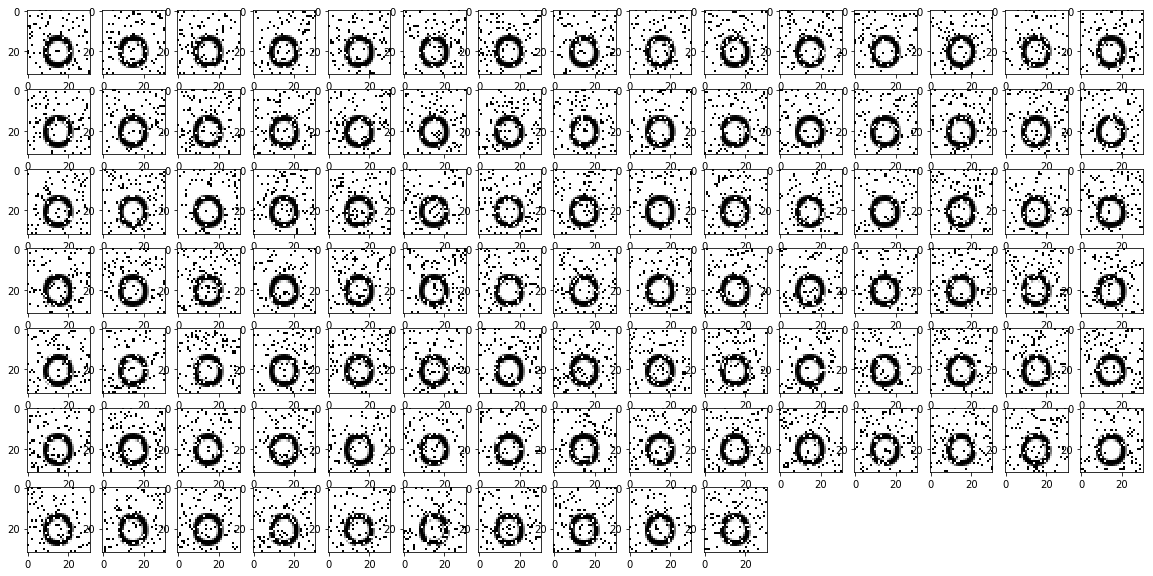

Training for label p...


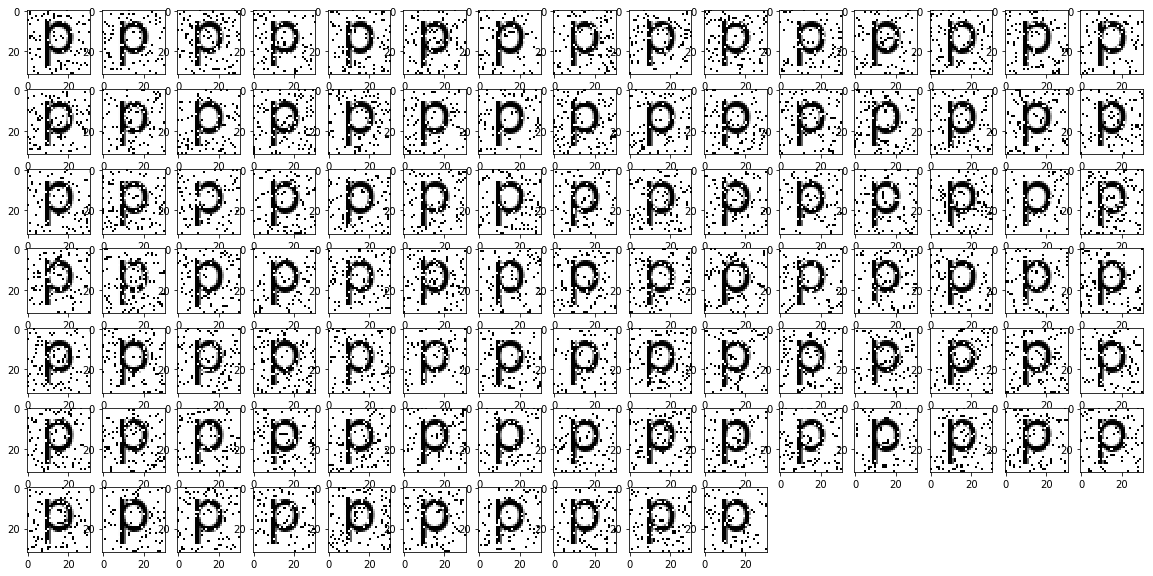

Training for label q...


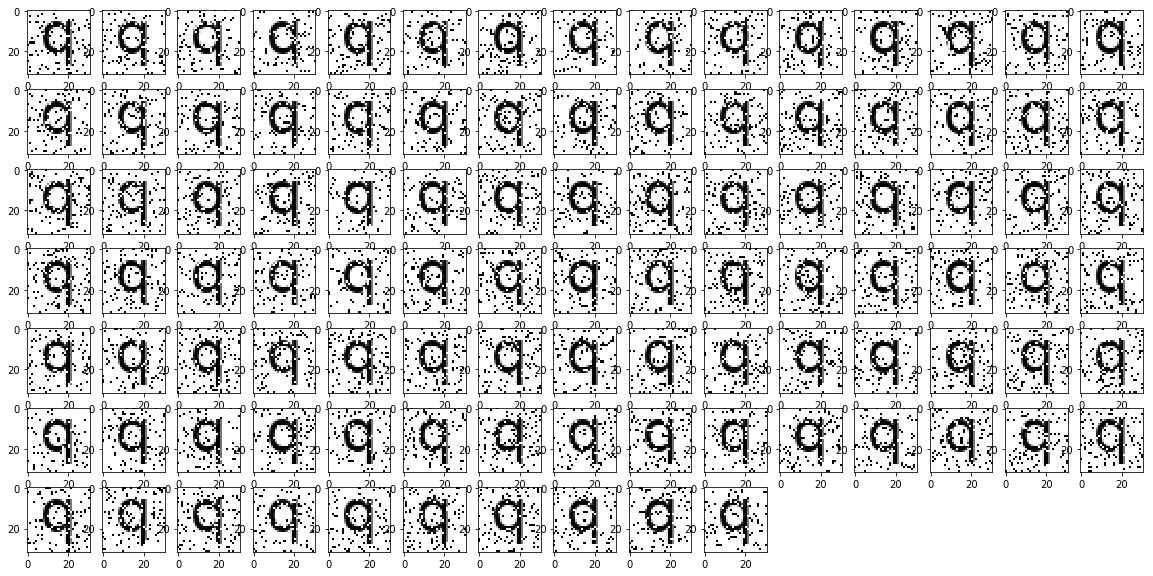

Training for label r...


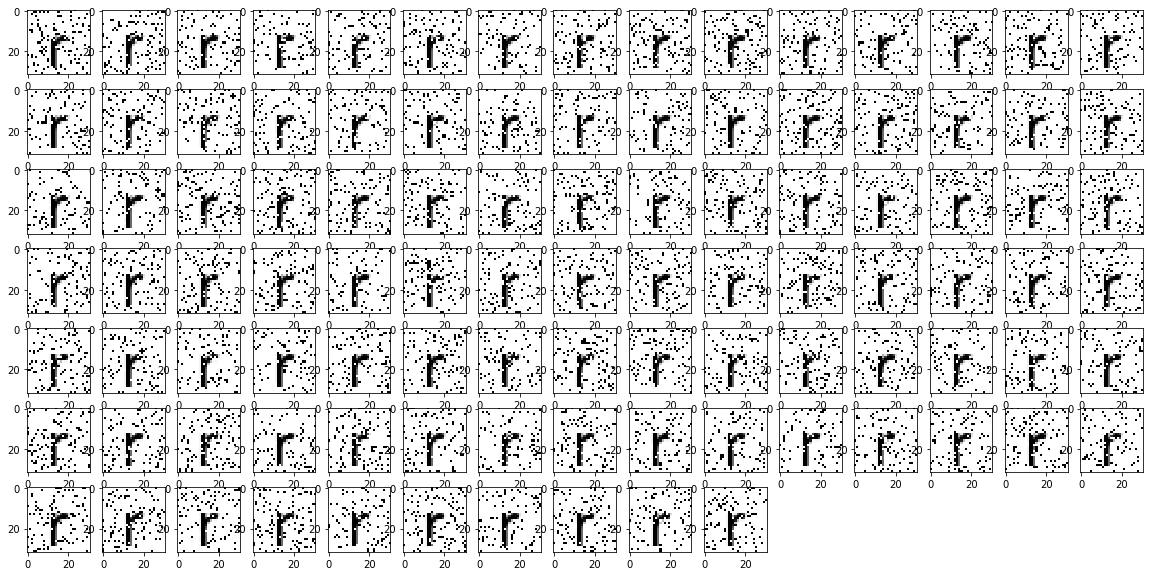

Training for label s...


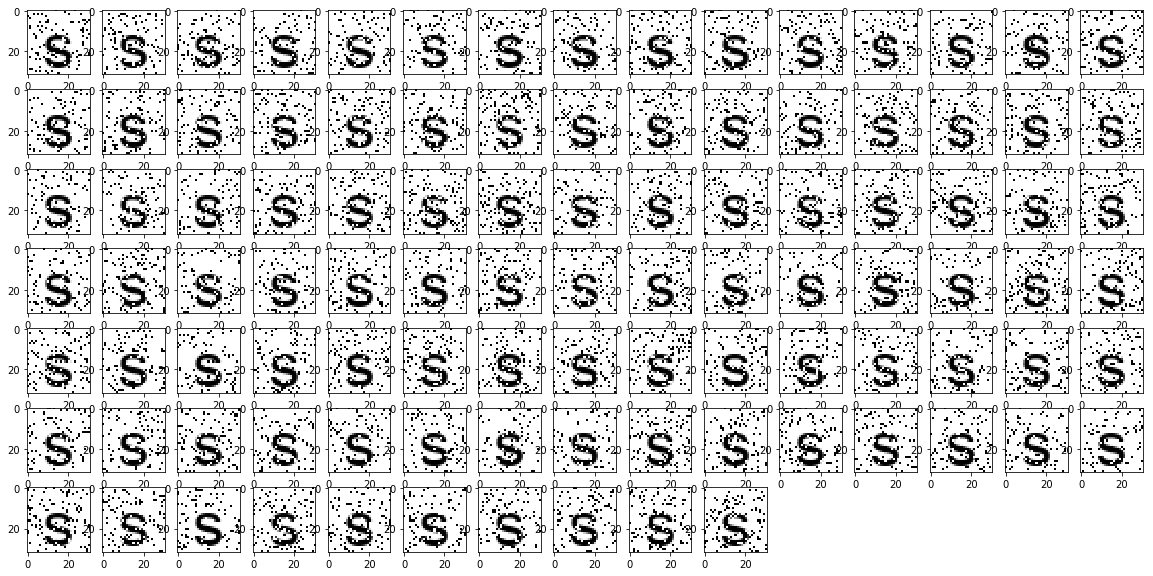

Training for label t...


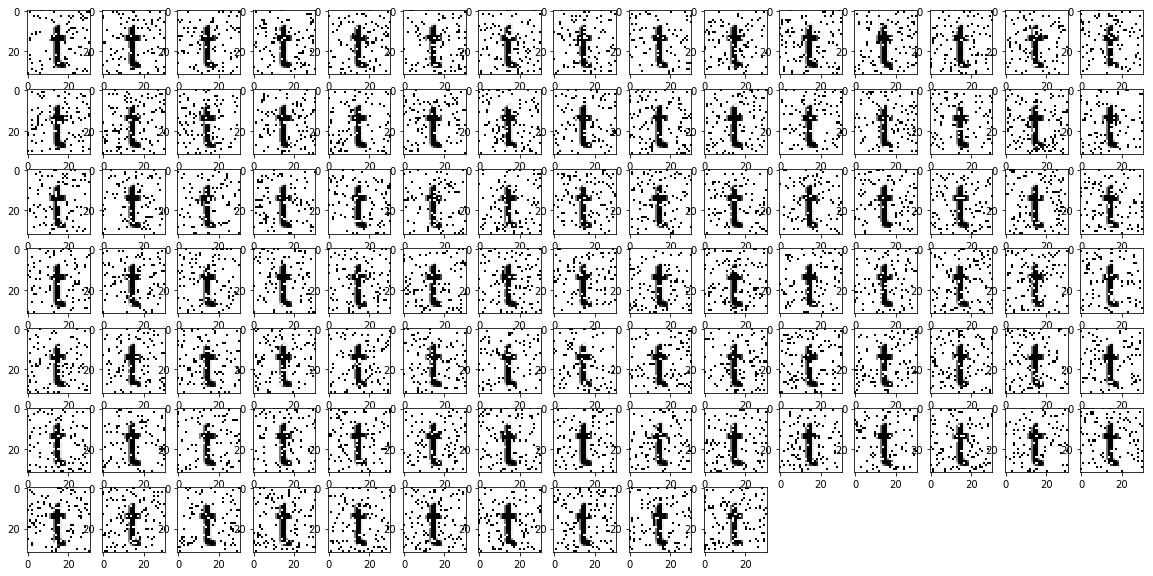

Training for label u...


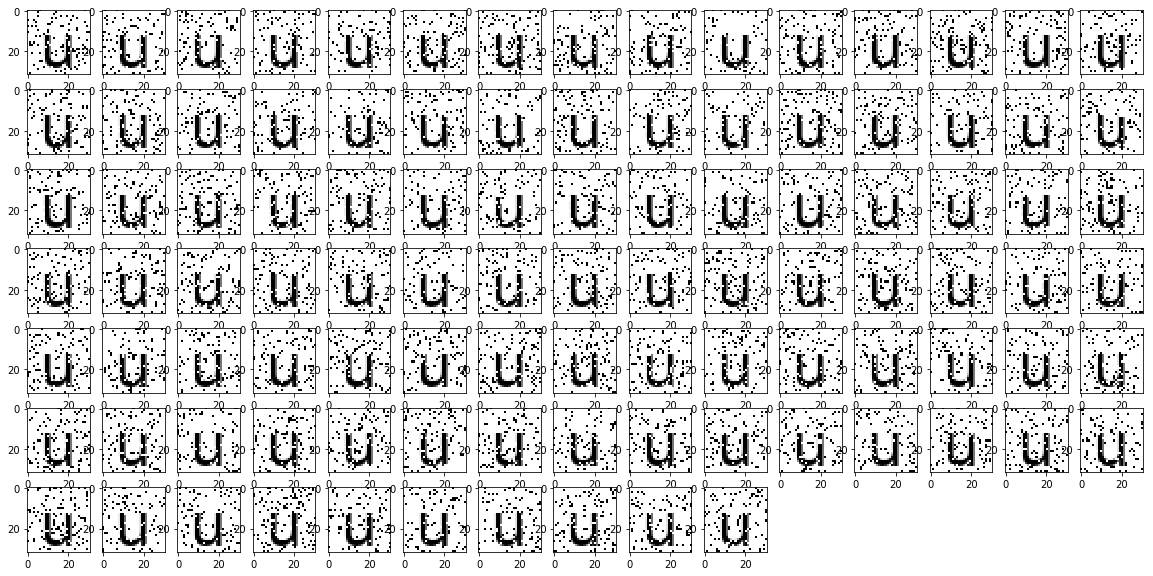

Training for label v...


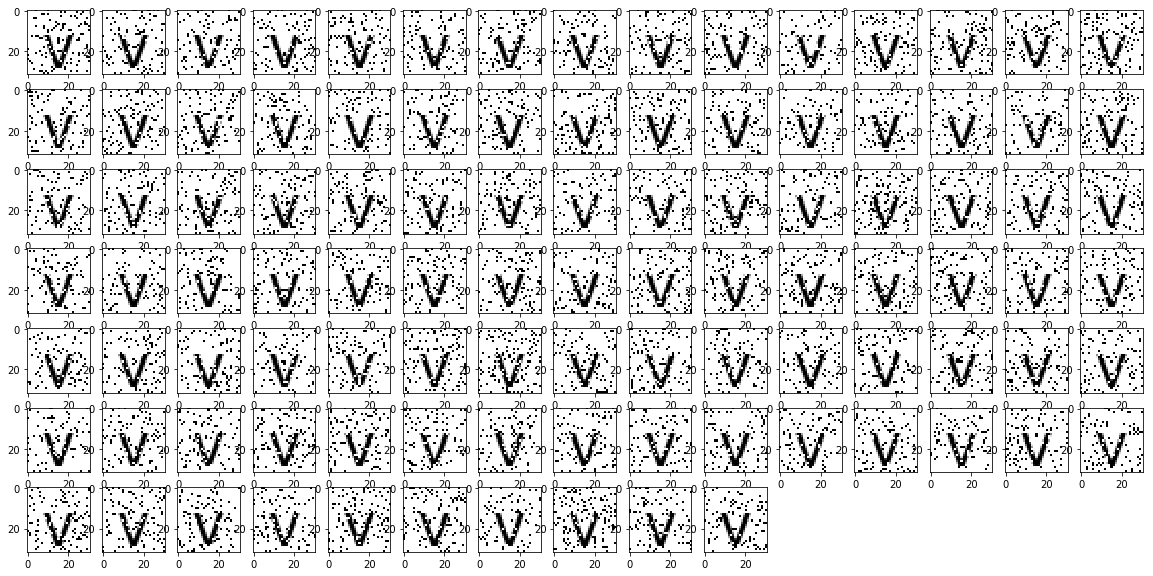

Training for label w...


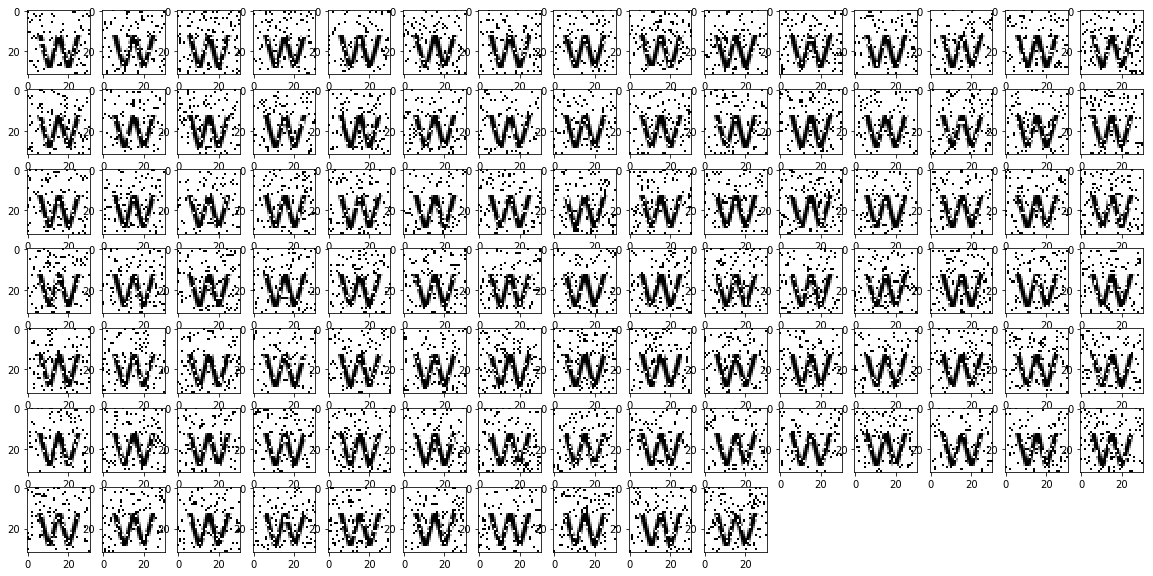

Training for label x...


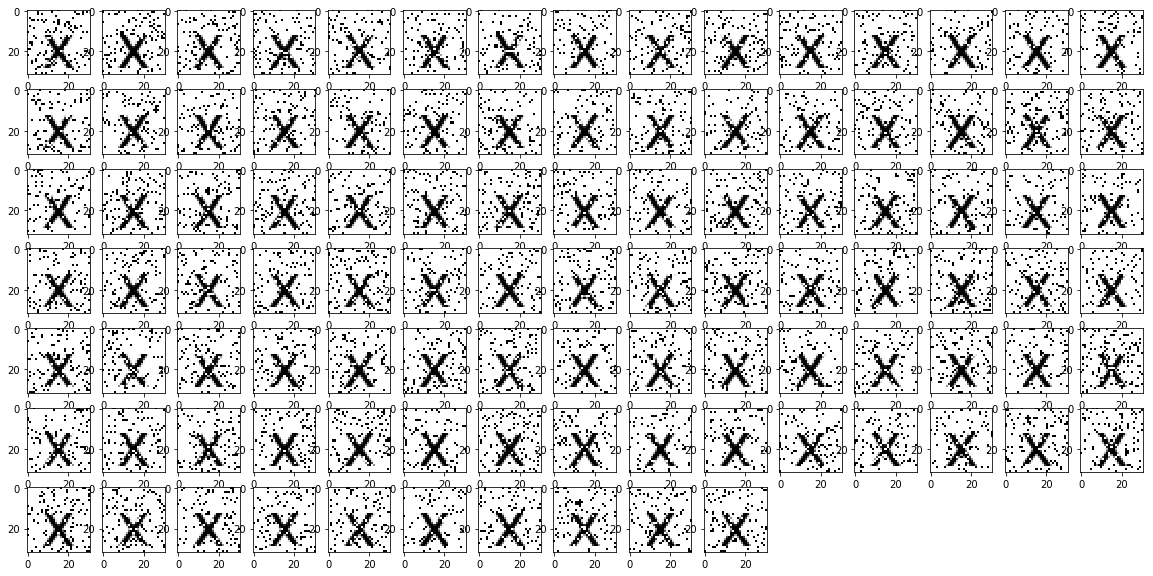

Training for label y...


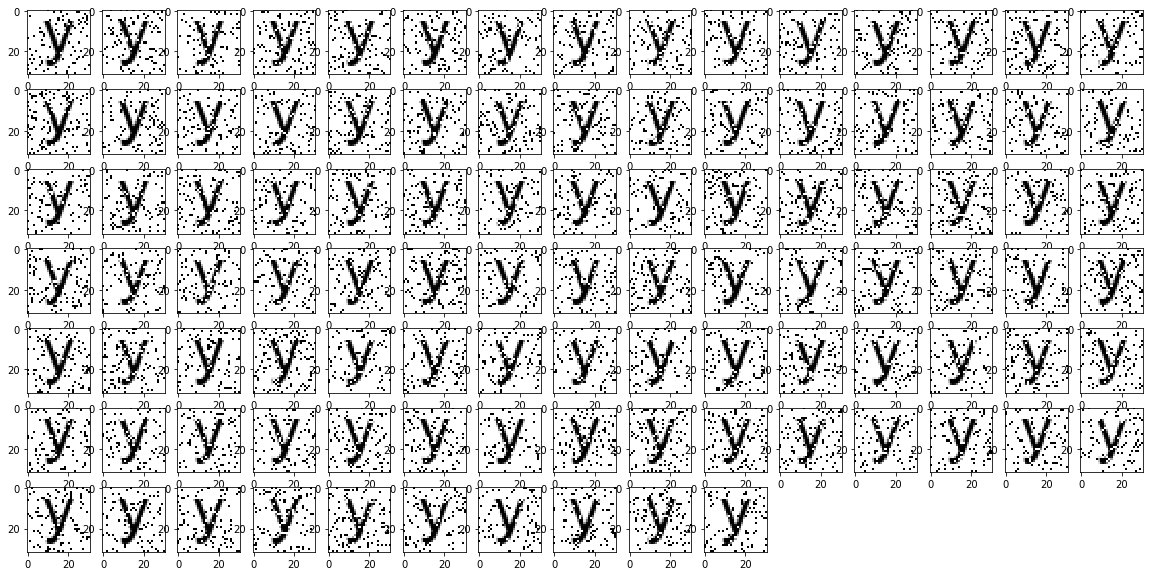

Training for label z...


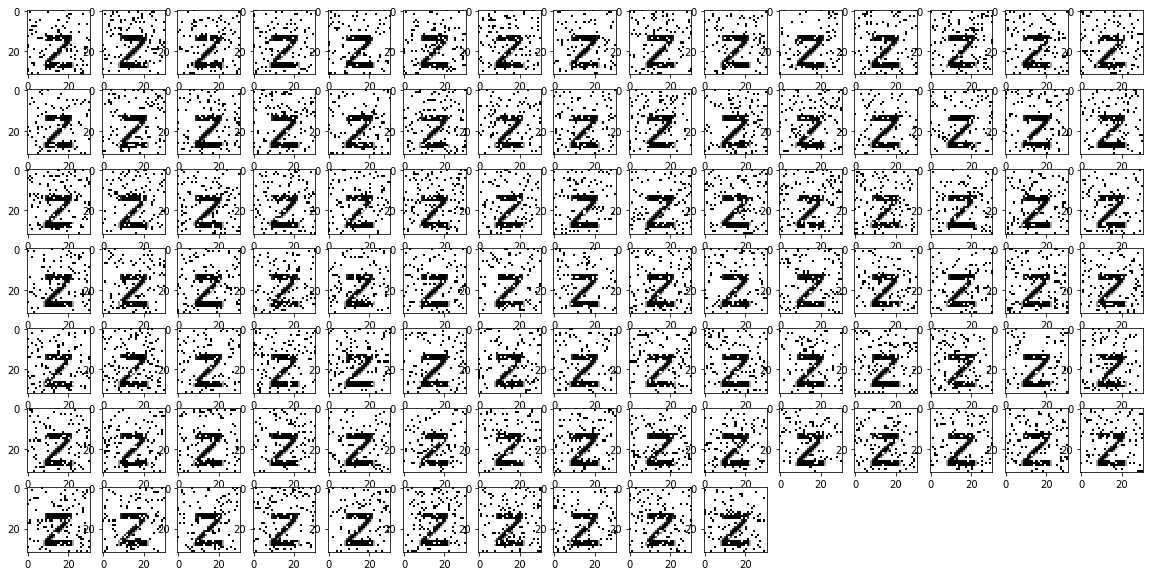

Training for label 0...


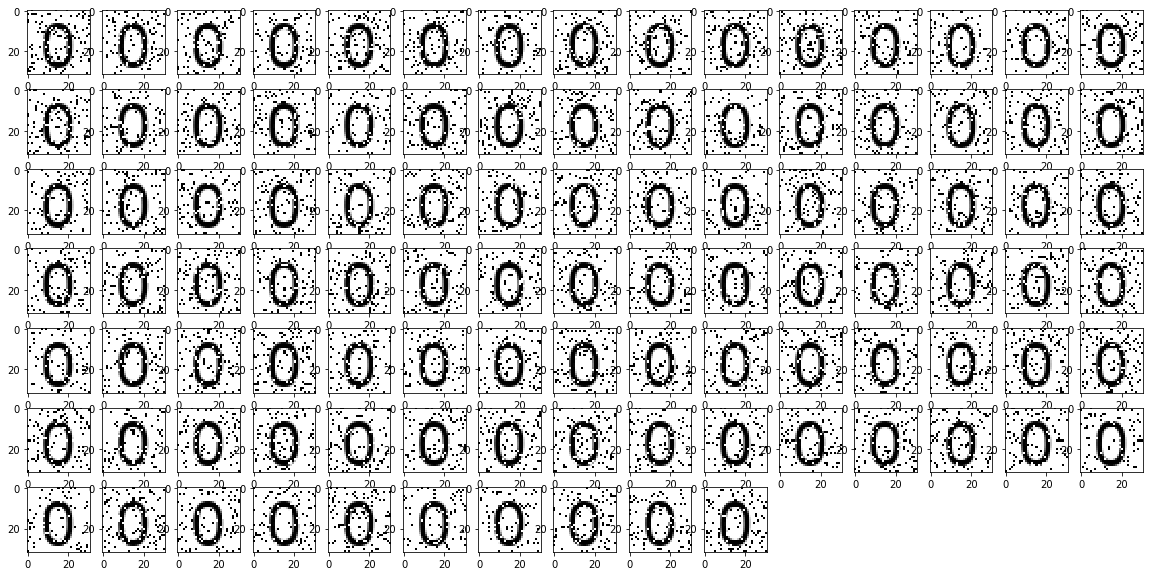

Training for label 1...


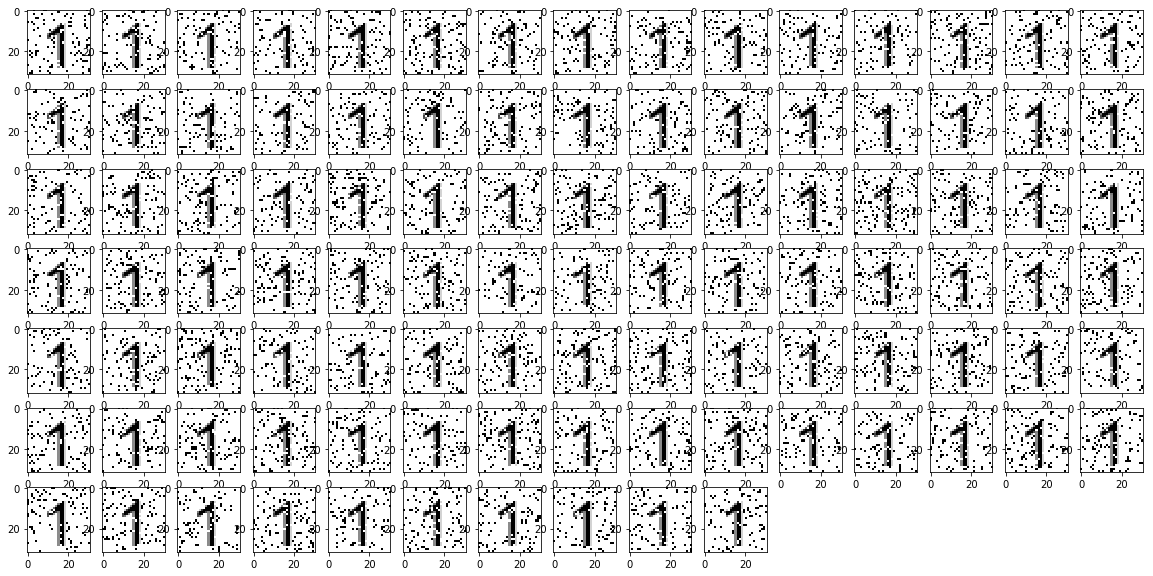

Training for label 2...


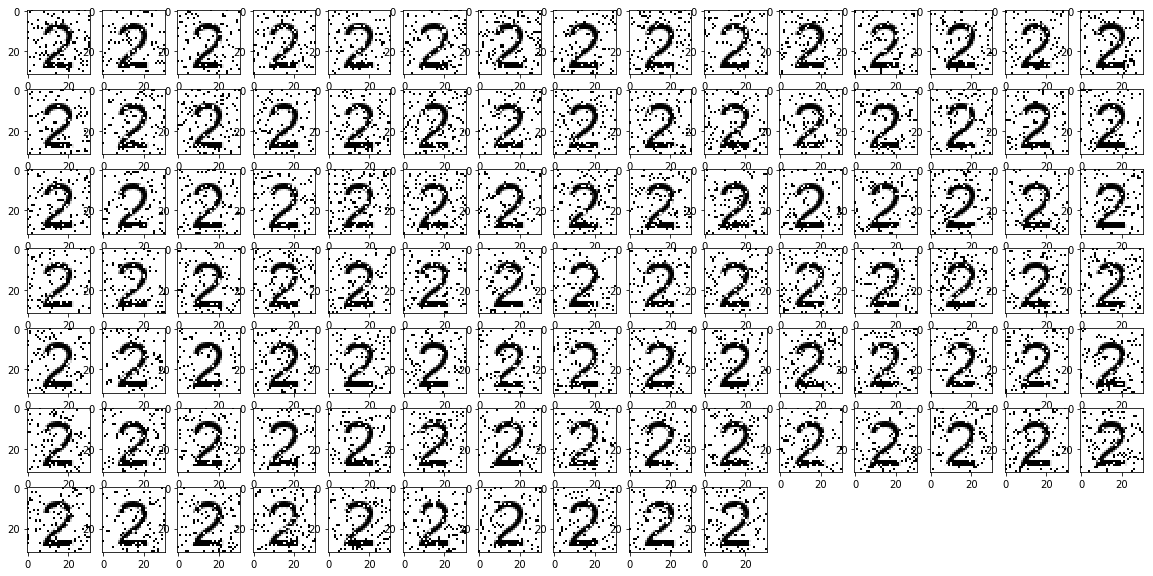

Training for label 3...


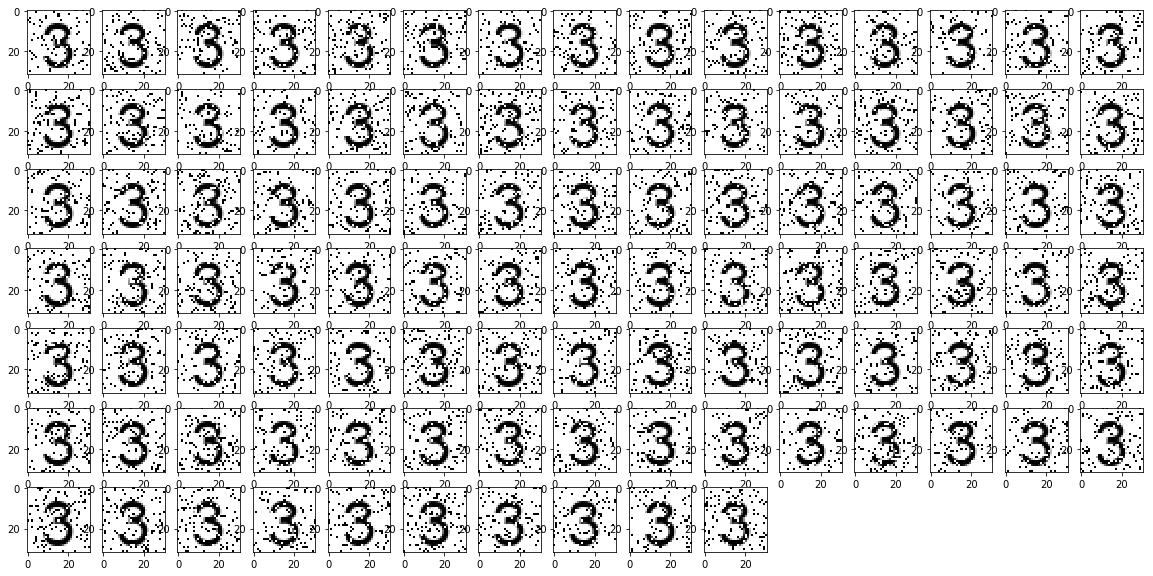

Training for label 4...


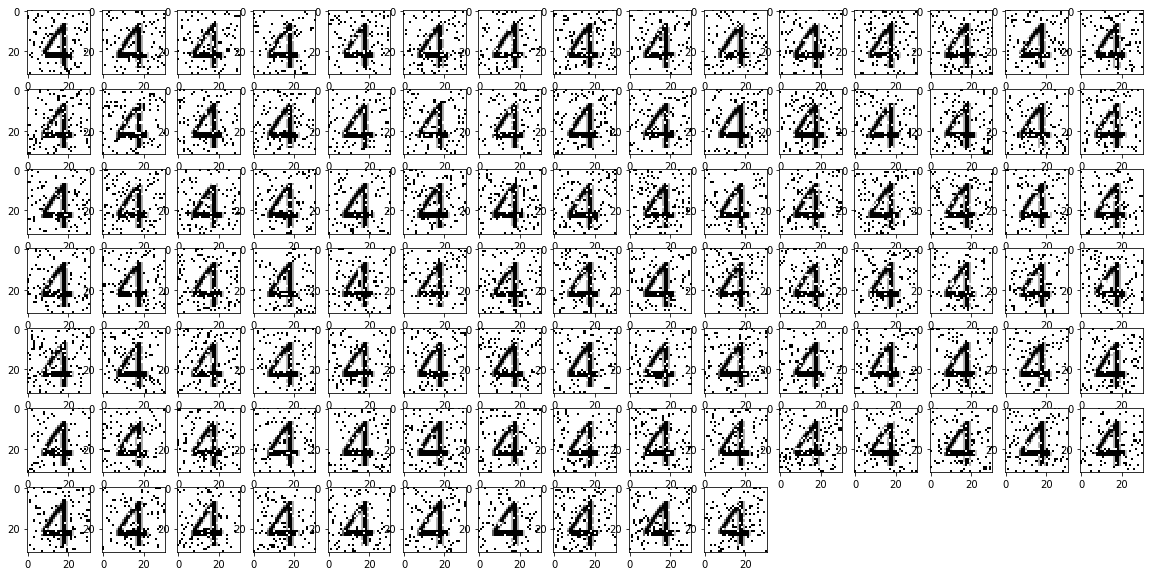

Training for label 5...


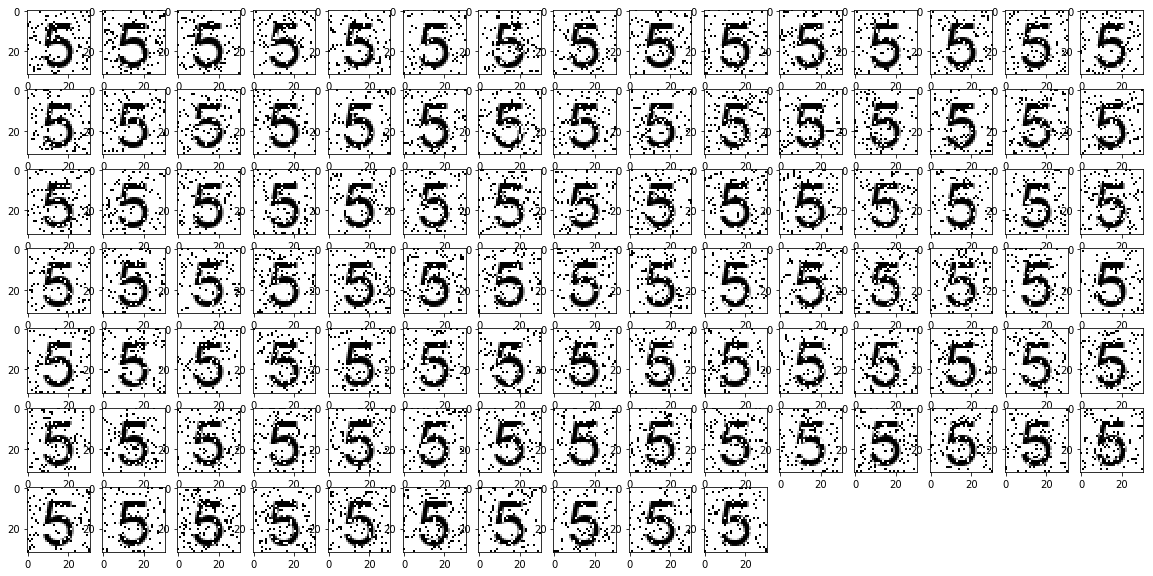

Training for label 6...


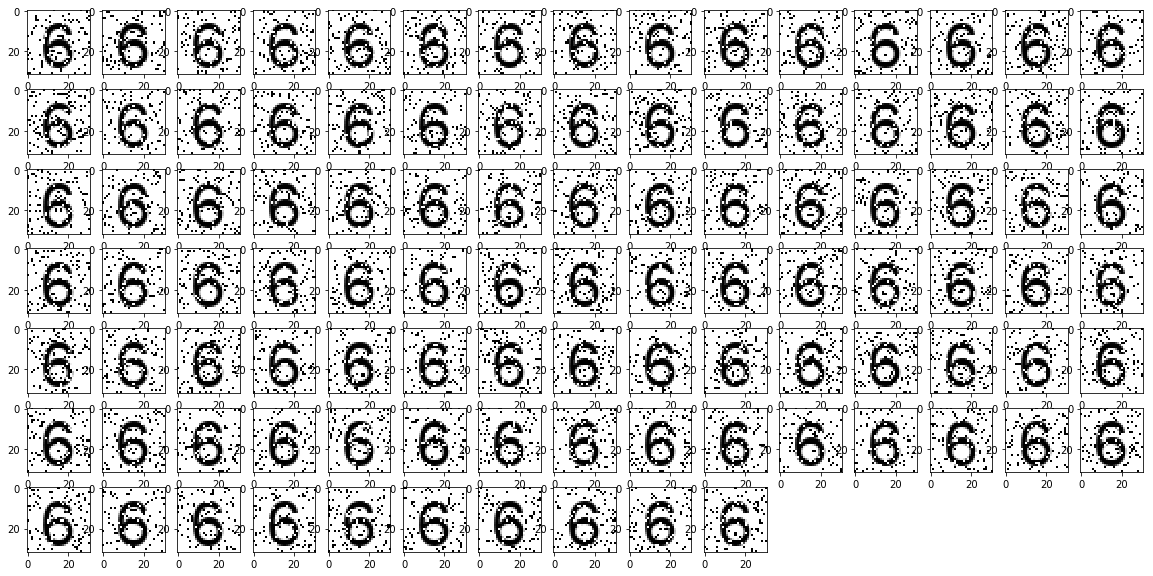

Training for label 7...


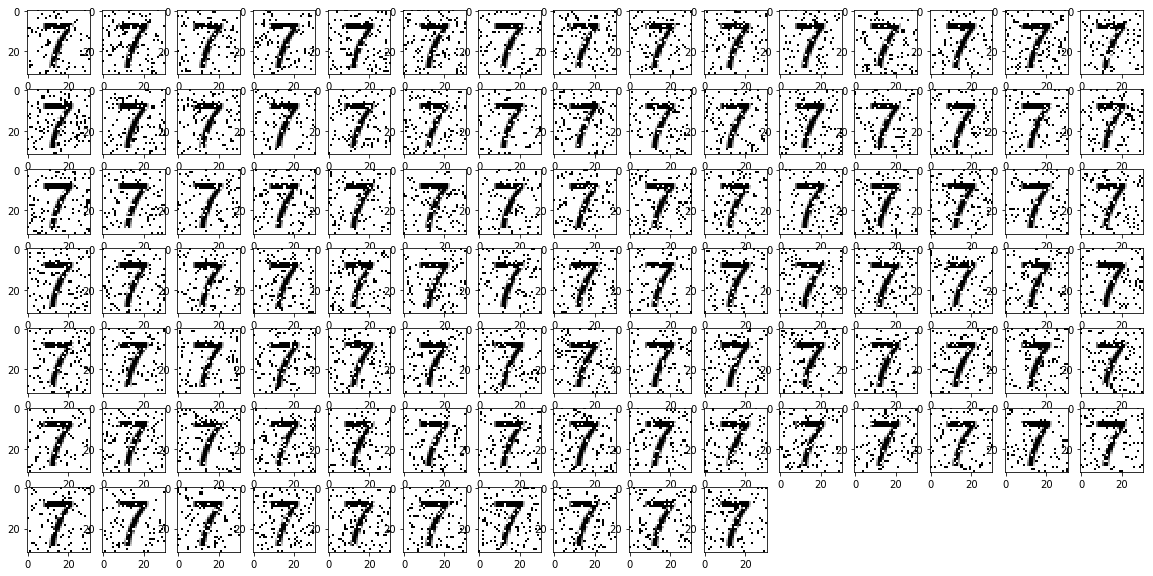

Training for label 8...


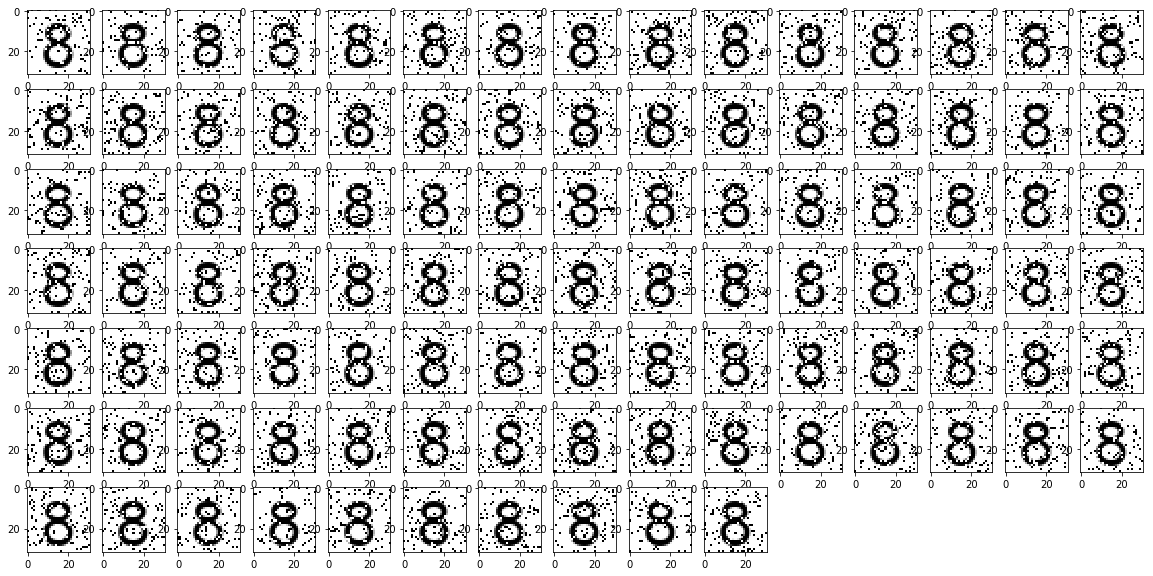

Training for label 9...


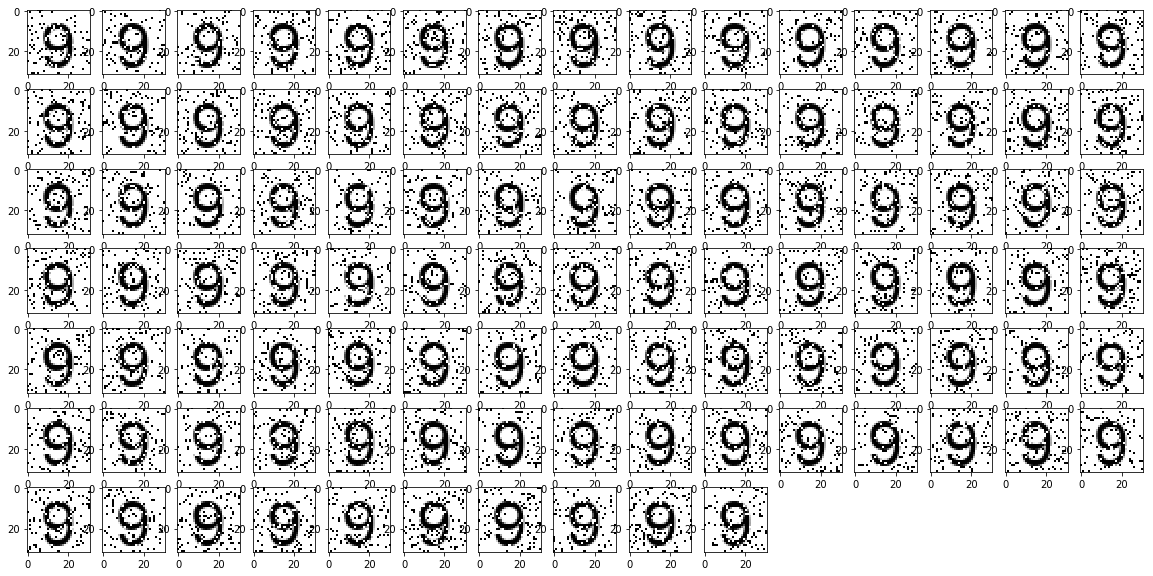

In [15]:
for x in labels:
    print 'Training for label {}...'.format(x)
    fill_memory(x, label_to_bs[x])

## Testing with high noise

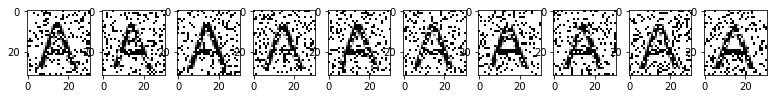

!! A correct=10 wrong= 0 answers=['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']


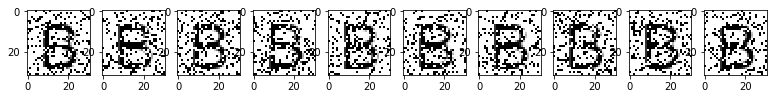

!! B correct=10 wrong= 0 answers=['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


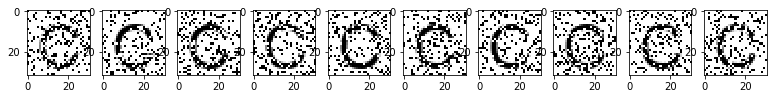

!! C correct=10 wrong= 0 answers=['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']


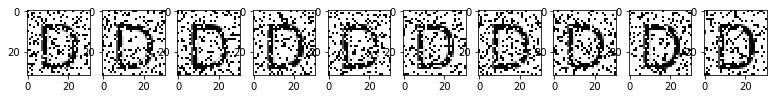

!! D correct=10 wrong= 0 answers=['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']


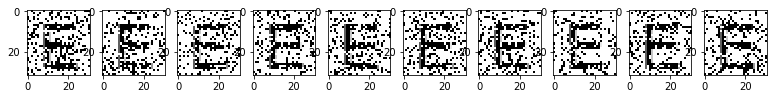

!! E correct=10 wrong= 0 answers=['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']


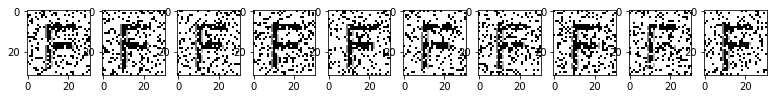

!! F correct= 9 wrong= 1 answers=['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'E']


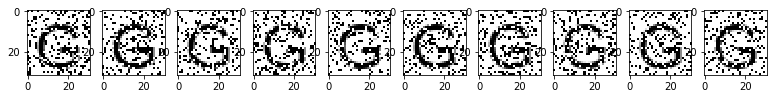

!! G correct=10 wrong= 0 answers=['G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G']


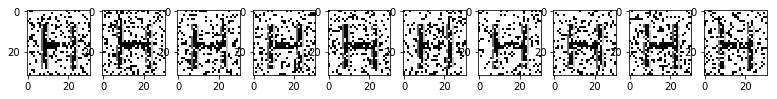

!! H correct=10 wrong= 0 answers=['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']


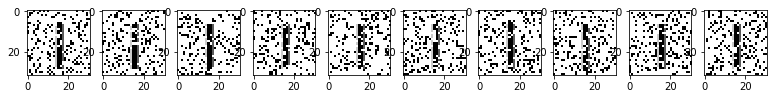

!! I correct= 7 wrong= 3 answers=['I', 'I', 'T', 'I', 'I', 'I', '1', 'I', 'T', 'I']


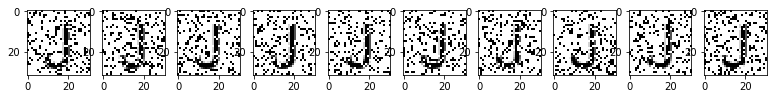

!! J correct=10 wrong= 0 answers=['J', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'J']


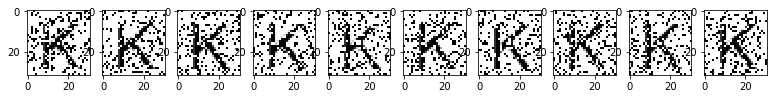

!! K correct= 7 wrong= 3 answers=['X', 'h', 'X', 'K', 'K', 'K', 'K', 'K', 'K', 'K']


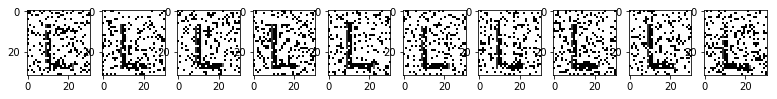

!! L correct=10 wrong= 0 answers=['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']


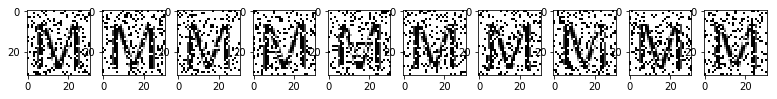

!! M correct=10 wrong= 0 answers=['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M']


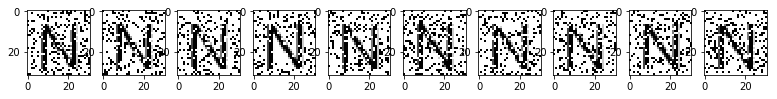

!! N correct=10 wrong= 0 answers=['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


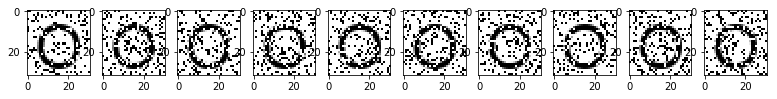

!! O correct=10 wrong= 0 answers=['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


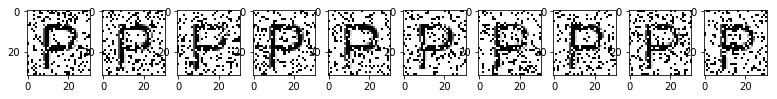

!! P correct= 7 wrong= 3 answers=['P', 'E', 'P', 'P', 'P', 'P', 'p', 'P', 'E', 'P']


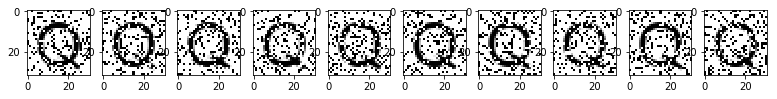

!! Q correct=10 wrong= 0 answers=['Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q']


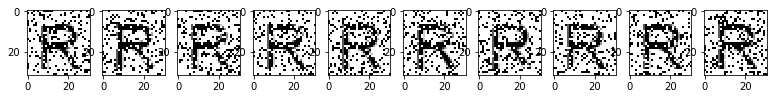

!! R correct=10 wrong= 0 answers=['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R']


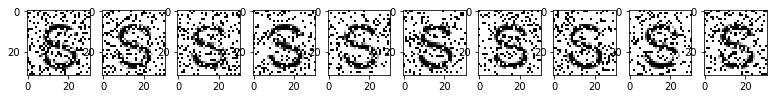

!! S correct= 8 wrong= 2 answers=['S', 'S', 'S', 'S', 'S', 'S', 'B', 'B', 'S', 'S']


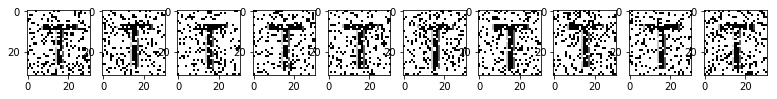

!! T correct=10 wrong= 0 answers=['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']


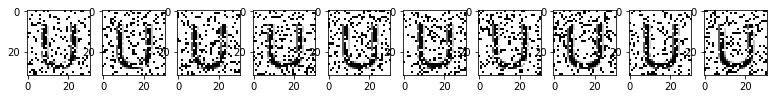

!! U correct= 9 wrong= 1 answers=['U', 'U', 'U', 'U', 'U', 'D', 'U', 'U', 'U', 'U']


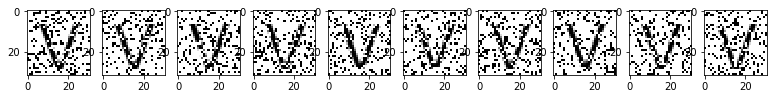

!! V correct=10 wrong= 0 answers=['V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V']


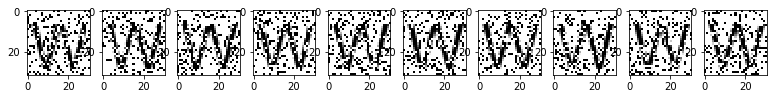

!! W correct=10 wrong= 0 answers=['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


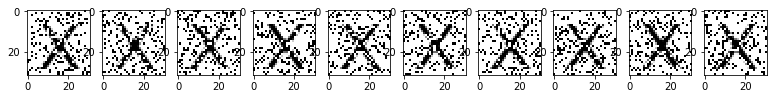

!! X correct=10 wrong= 0 answers=['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']


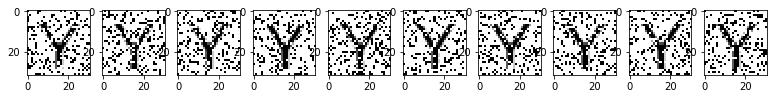

!! Y correct=10 wrong= 0 answers=['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']


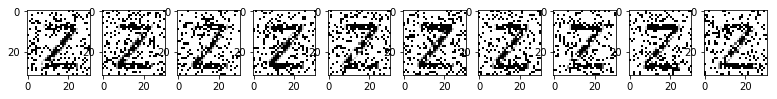

!! Z correct=10 wrong= 0 answers=['Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z']


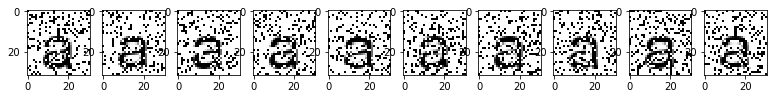

!! a correct= 0 wrong=10 answers=['d', 'd', 'd', 'd', 'd', 'd', 'd', 'n', 'd', 'n']


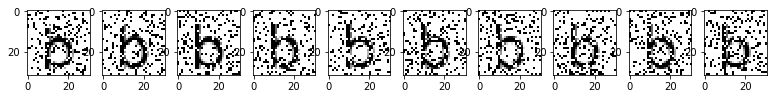

!! b correct= 0 wrong=10 answers=['o', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'o', 'o']


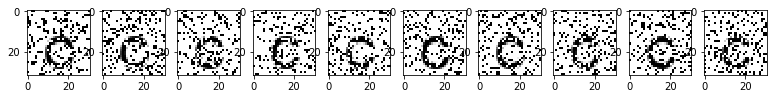

!! c correct= 9 wrong= 1 answers=['c', 'c', 'c', 'c', 'c', 'o', 'c', 'c', 'c', 'c']


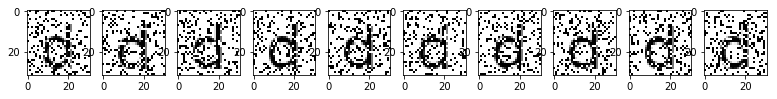

!! d correct=10 wrong= 0 answers=['d', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd']


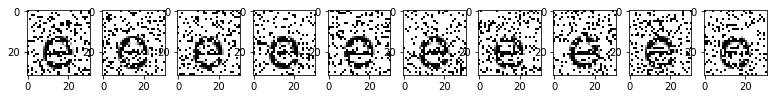

!! e correct= 4 wrong= 6 answers=['e', 'o', 'o', 'o', 'e', 'o', 'e', 'o', 'e', 'o']


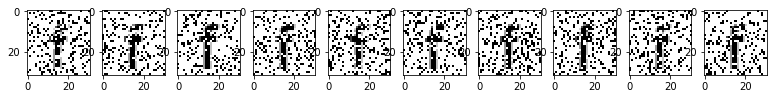

!! f correct=10 wrong= 0 answers=['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f']


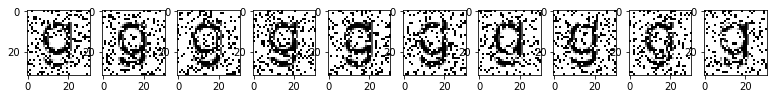

!! g correct=10 wrong= 0 answers=['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g']


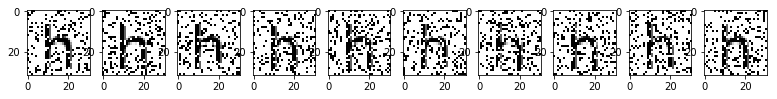

!! h correct=10 wrong= 0 answers=['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']


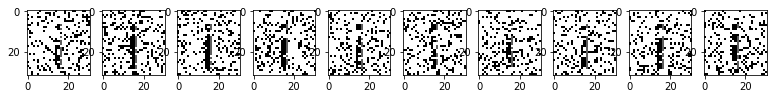

!! i correct= 9 wrong= 1 answers=['i', 'i', 'i', 'i', 'i', 'i', '1', 'i', 'i', 'i']


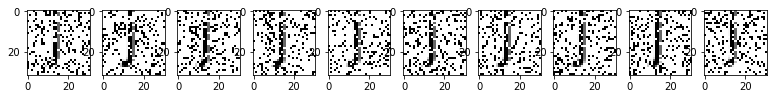

!! j correct=10 wrong= 0 answers=['j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'j']


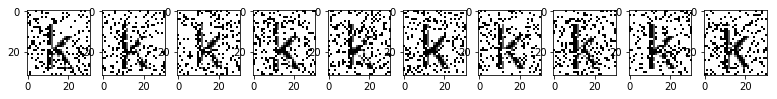

!! k correct=10 wrong= 0 answers=['k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k']


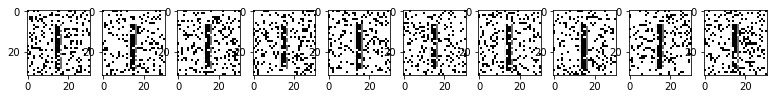

!! l correct= 2 wrong= 8 answers=['t', 'f', 'f', 'f', 'l', 't', '1', 't', 'l', 'T']


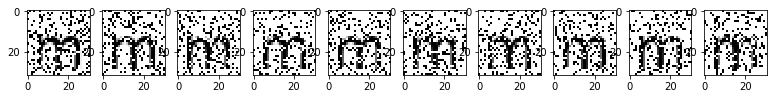

!! m correct=10 wrong= 0 answers=['m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm']


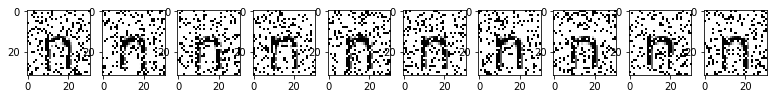

!! n correct= 9 wrong= 1 answers=['n', 'n', 'h', 'n', 'n', 'n', 'n', 'n', 'n', 'n']


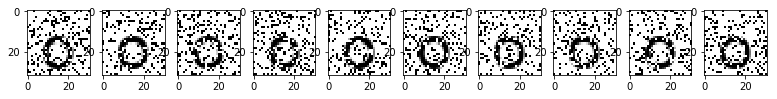

!! o correct=10 wrong= 0 answers=['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']


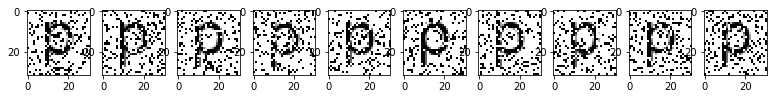

!! p correct=10 wrong= 0 answers=['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p']


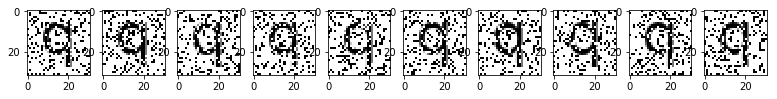

!! q correct=10 wrong= 0 answers=['q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q']


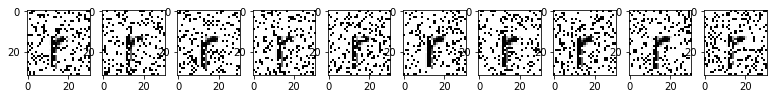

!! r correct= 9 wrong= 1 answers=['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', '1']


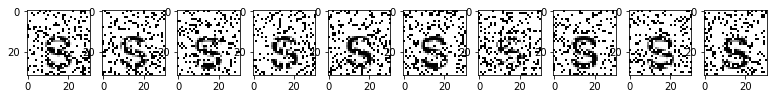

!! s correct=10 wrong= 0 answers=['s', 's', 's', 's', 's', 's', 's', 's', 's', 's']


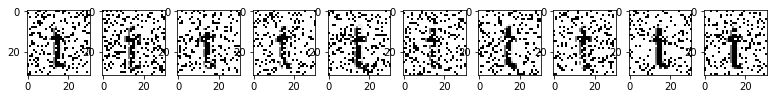

!! t correct=10 wrong= 0 answers=['t', 't', 't', 't', 't', 't', 't', 't', 't', 't']


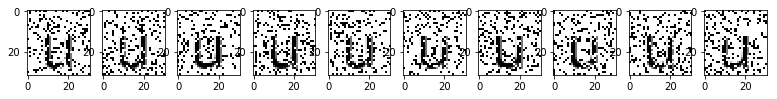

!! u correct= 8 wrong= 2 answers=['u', 'd', 'd', 'u', 'u', 'u', 'u', 'u', 'u', 'u']


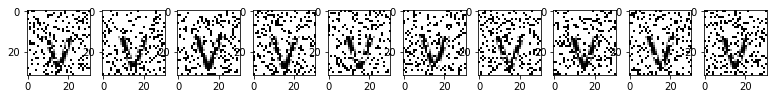

!! v correct=10 wrong= 0 answers=['v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v']


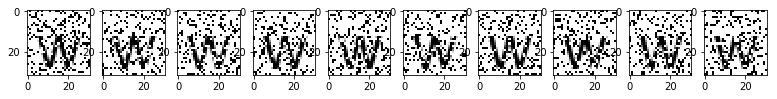

!! w correct=10 wrong= 0 answers=['w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w']


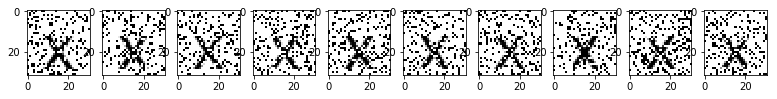

!! x correct= 8 wrong= 2 answers=['x', 'x', 'z', 'z', 'x', 'x', 'x', 'x', 'x', 'x']


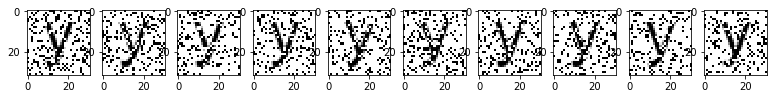

!! y correct=10 wrong= 0 answers=['y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y']


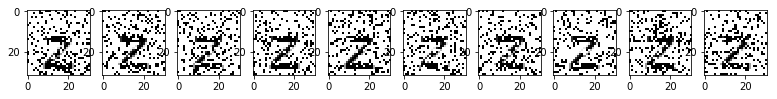

!! z correct=10 wrong= 0 answers=['z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z']


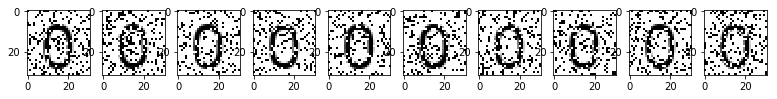

!! 0 correct= 0 wrong=10 answers=['8', 'g', 'g', 'g', 'g', '9', '9', '9', '9', '9']


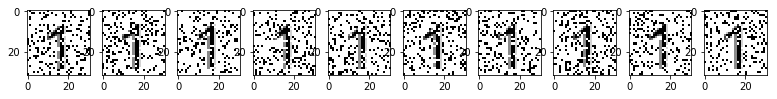

!! 1 correct=10 wrong= 0 answers=['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


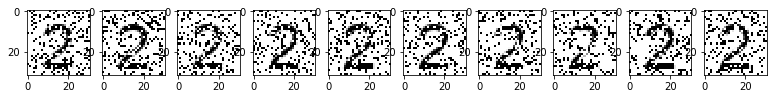

!! 2 correct=10 wrong= 0 answers=['2', '2', '2', '2', '2', '2', '2', '2', '2', '2']


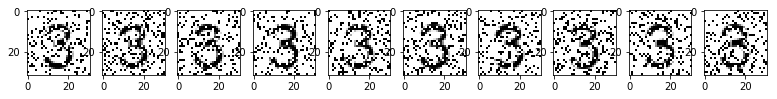

!! 3 correct=10 wrong= 0 answers=['3', '3', '3', '3', '3', '3', '3', '3', '3', '3']


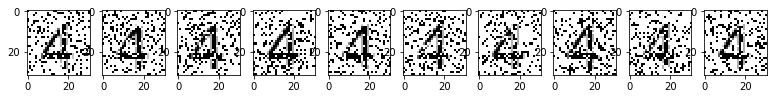

!! 4 correct= 7 wrong= 3 answers=['1', '1', '4', '4', '4', '4', '4', '4', '1', '4']


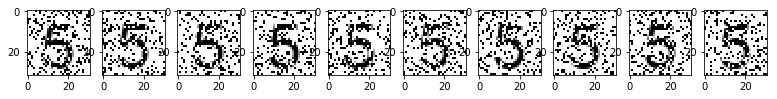

!! 5 correct=10 wrong= 0 answers=['5', '5', '5', '5', '5', '5', '5', '5', '5', '5']


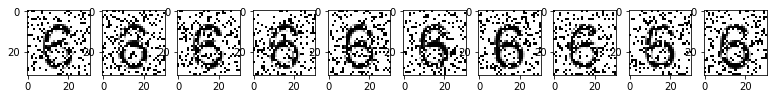

!! 6 correct= 9 wrong= 1 answers=['6', '6', '6', '6', '6', '8', '6', '6', '6', '6']


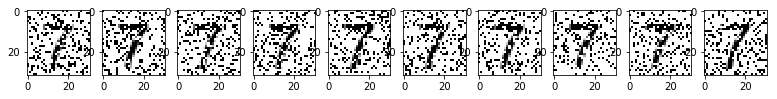

!! 7 correct=10 wrong= 0 answers=['7', '7', '7', '7', '7', '7', '7', '7', '7', '7']


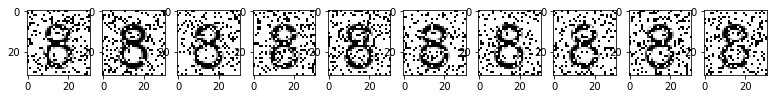

!! 8 correct=10 wrong= 0 answers=['8', '8', '8', '8', '8', '8', '8', '8', '8', '8']


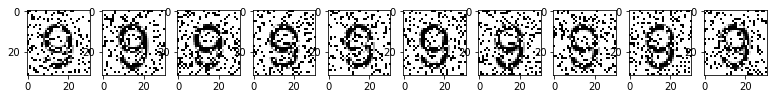

!! 9 correct=10 wrong= 0 answers=['9', '9', '9', '9', '9', '9', '9', '9', '9', '9']


In [16]:
for x in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789':
    iter_read(x)

## Testing with low noise

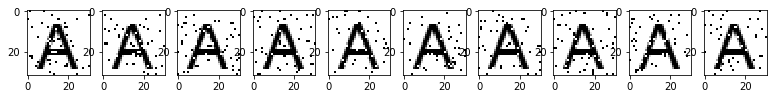

!! A correct=10 wrong= 0 answers=['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']


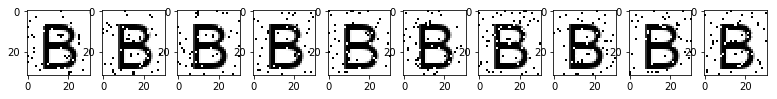

!! B correct=10 wrong= 0 answers=['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


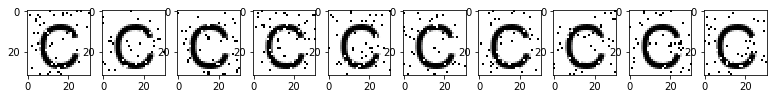

!! C correct=10 wrong= 0 answers=['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']


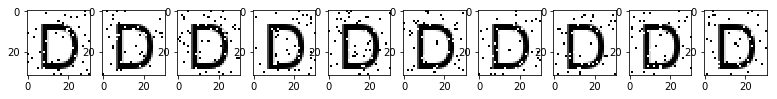

!! D correct=10 wrong= 0 answers=['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']


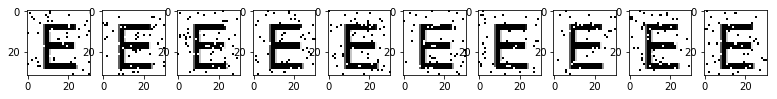

!! E correct=10 wrong= 0 answers=['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']


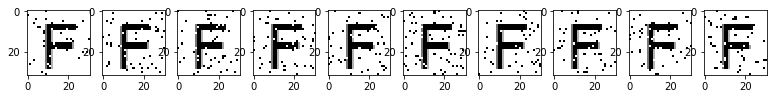

!! F correct=10 wrong= 0 answers=['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F']


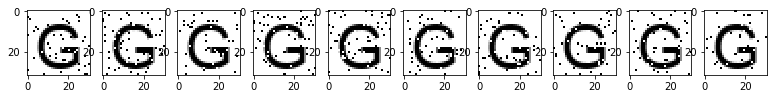

!! G correct=10 wrong= 0 answers=['G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G']


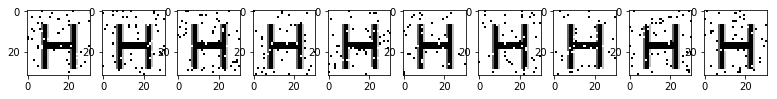

!! H correct=10 wrong= 0 answers=['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']


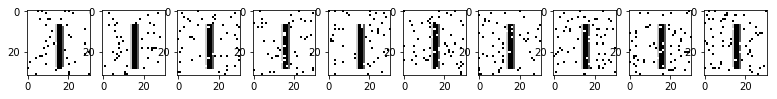

!! I correct= 9 wrong= 1 answers=['I', 'I', 'I', 'I', 'T', 'I', 'I', 'I', 'I', 'I']


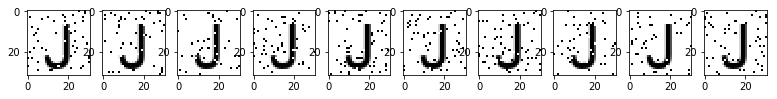

!! J correct=10 wrong= 0 answers=['J', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'J']


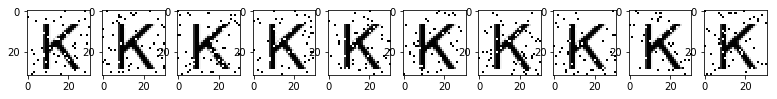

!! K correct=10 wrong= 0 answers=['K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K']


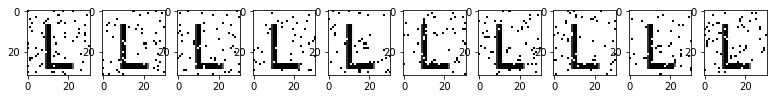

!! L correct=10 wrong= 0 answers=['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']


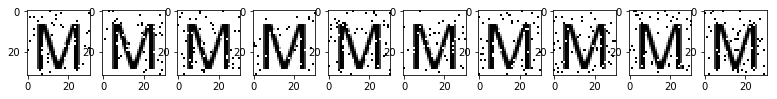

!! M correct=10 wrong= 0 answers=['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M']


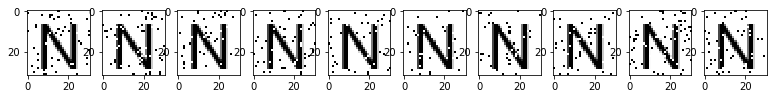

!! N correct=10 wrong= 0 answers=['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


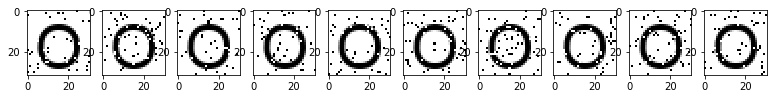

!! O correct=10 wrong= 0 answers=['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


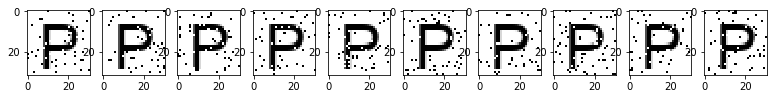

!! P correct=10 wrong= 0 answers=['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P']


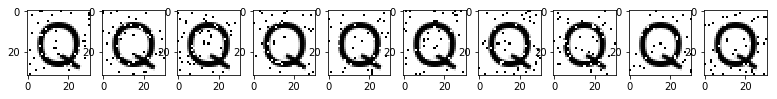

!! Q correct=10 wrong= 0 answers=['Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q']


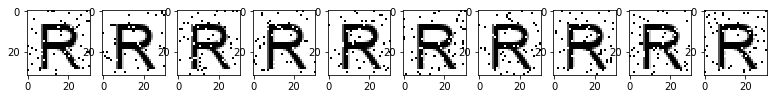

!! R correct=10 wrong= 0 answers=['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R']


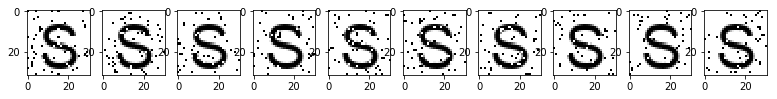

!! S correct=10 wrong= 0 answers=['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']


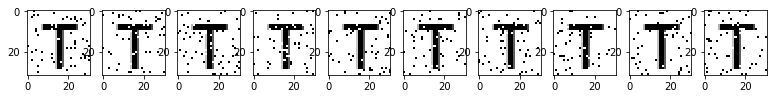

!! T correct=10 wrong= 0 answers=['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']


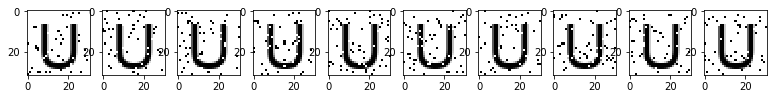

!! U correct=10 wrong= 0 answers=['U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U']


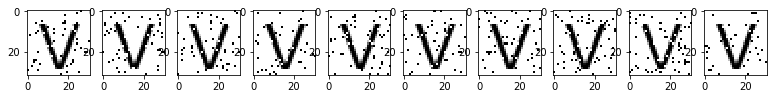

!! V correct=10 wrong= 0 answers=['V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V']


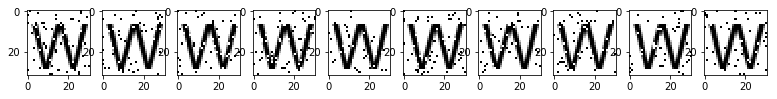

!! W correct=10 wrong= 0 answers=['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


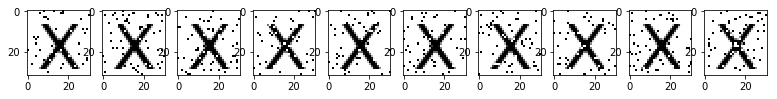

!! X correct=10 wrong= 0 answers=['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']


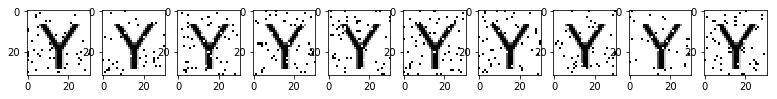

!! Y correct=10 wrong= 0 answers=['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']


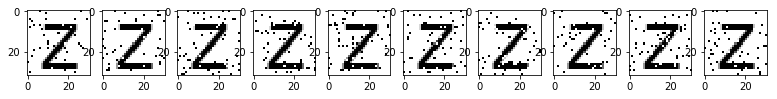

!! Z correct=10 wrong= 0 answers=['Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z']


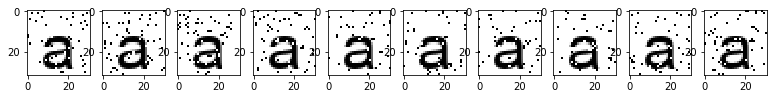

!! a correct=10 wrong= 0 answers=['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']


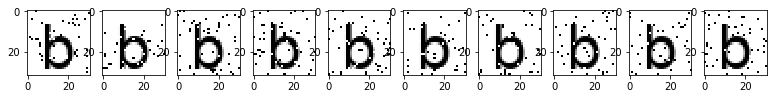

!! b correct= 0 wrong=10 answers=['h', 'o', 'o', 'h', 'h', 'h', 'h', 'h', 'o', 'h']


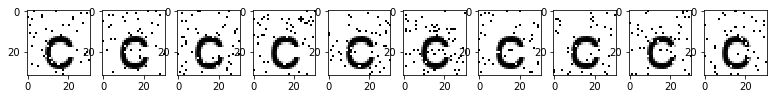

!! c correct=10 wrong= 0 answers=['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c']


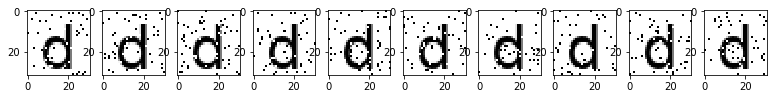

!! d correct=10 wrong= 0 answers=['d', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd']


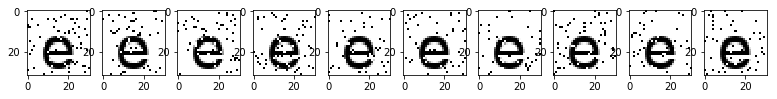

!! e correct=10 wrong= 0 answers=['e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e']


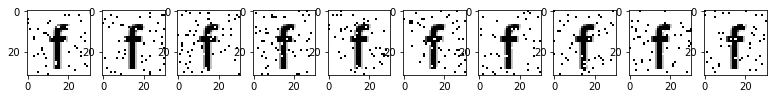

!! f correct=10 wrong= 0 answers=['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f']


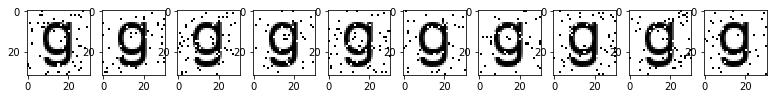

!! g correct=10 wrong= 0 answers=['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g']


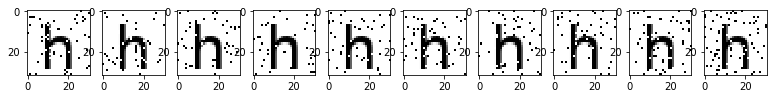

!! h correct=10 wrong= 0 answers=['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h']


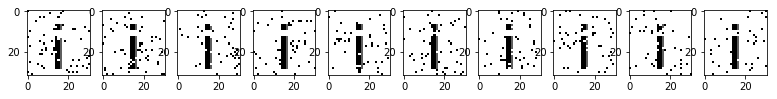

!! i correct=10 wrong= 0 answers=['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i']


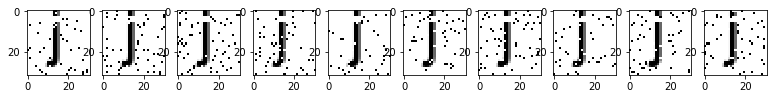

!! j correct=10 wrong= 0 answers=['j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'j', 'j']


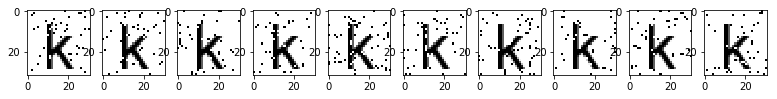

!! k correct=10 wrong= 0 answers=['k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k']


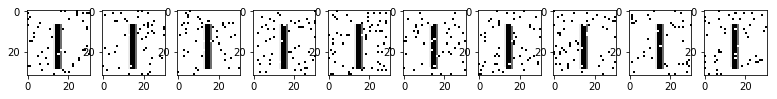

!! l correct=10 wrong= 0 answers=['l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l']


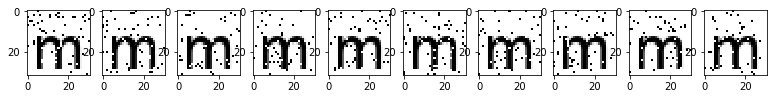

!! m correct=10 wrong= 0 answers=['m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm']


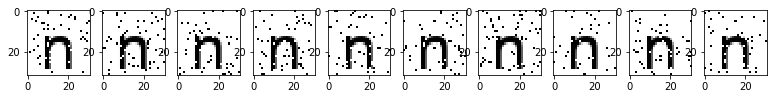

!! n correct=10 wrong= 0 answers=['n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n']


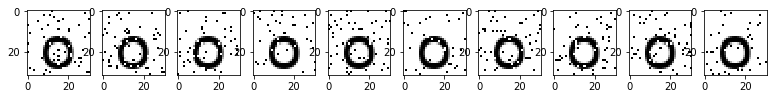

!! o correct=10 wrong= 0 answers=['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']


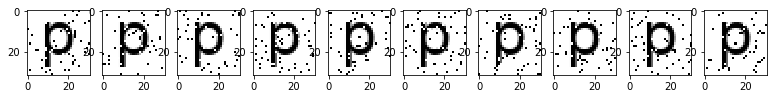

!! p correct=10 wrong= 0 answers=['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p']


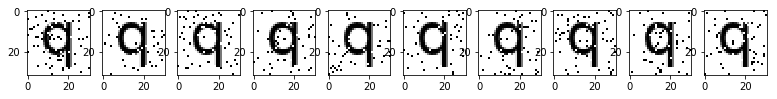

!! q correct=10 wrong= 0 answers=['q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q', 'q']


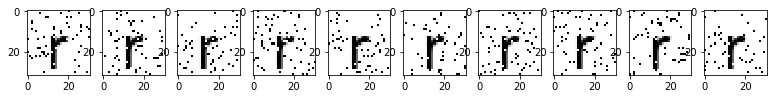

!! r correct=10 wrong= 0 answers=['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']


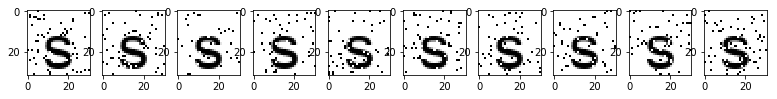

!! s correct=10 wrong= 0 answers=['s', 's', 's', 's', 's', 's', 's', 's', 's', 's']


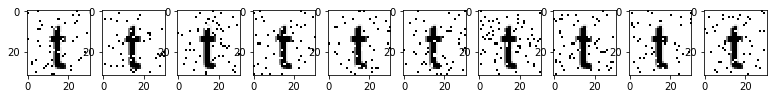

!! t correct=10 wrong= 0 answers=['t', 't', 't', 't', 't', 't', 't', 't', 't', 't']


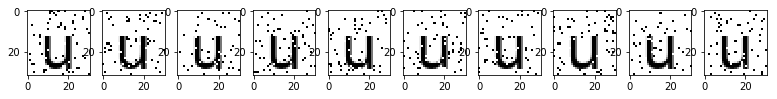

!! u correct=10 wrong= 0 answers=['u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'u']


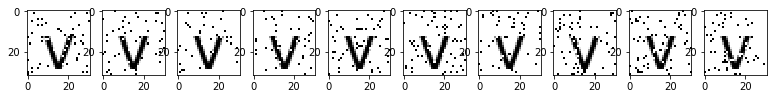

!! v correct=10 wrong= 0 answers=['v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v']


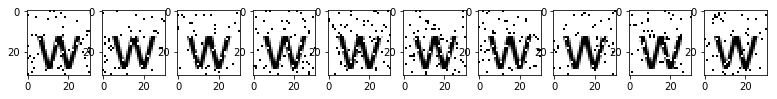

!! w correct=10 wrong= 0 answers=['w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w']


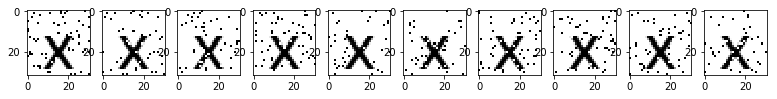

!! x correct=10 wrong= 0 answers=['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']


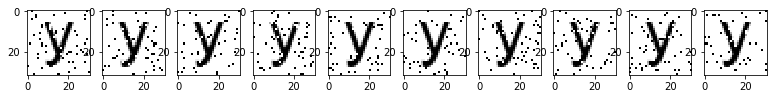

!! y correct=10 wrong= 0 answers=['y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y']


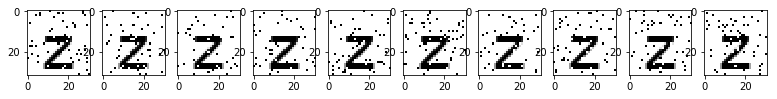

!! z correct=10 wrong= 0 answers=['z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z']


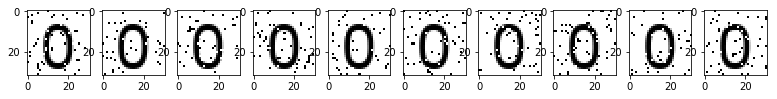

!! 0 correct= 3 wrong= 7 answers=['9', '0', 'g', '8', '0', '8', '8', '8', '0', '9']


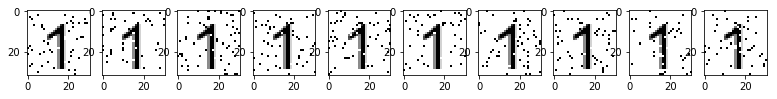

!! 1 correct=10 wrong= 0 answers=['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


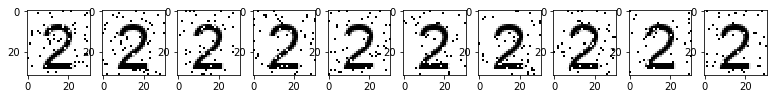

!! 2 correct=10 wrong= 0 answers=['2', '2', '2', '2', '2', '2', '2', '2', '2', '2']


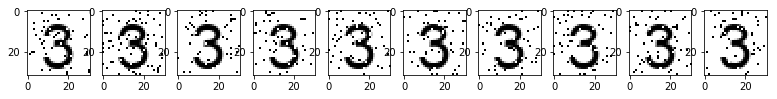

!! 3 correct=10 wrong= 0 answers=['3', '3', '3', '3', '3', '3', '3', '3', '3', '3']


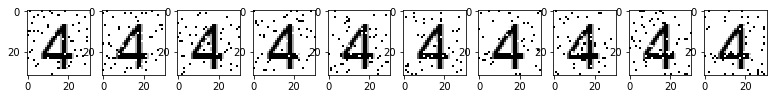

!! 4 correct=10 wrong= 0 answers=['4', '4', '4', '4', '4', '4', '4', '4', '4', '4']


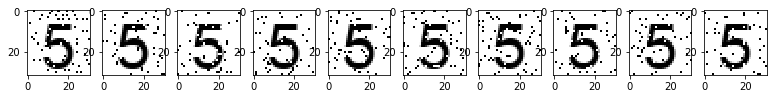

!! 5 correct=10 wrong= 0 answers=['5', '5', '5', '5', '5', '5', '5', '5', '5', '5']


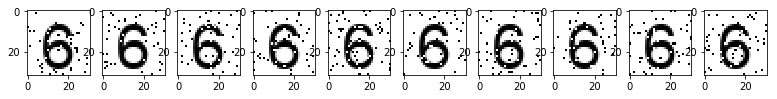

!! 6 correct=10 wrong= 0 answers=['6', '6', '6', '6', '6', '6', '6', '6', '6', '6']


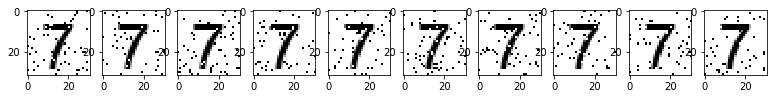

!! 7 correct=10 wrong= 0 answers=['7', '7', '7', '7', '7', '7', '7', '7', '7', '7']


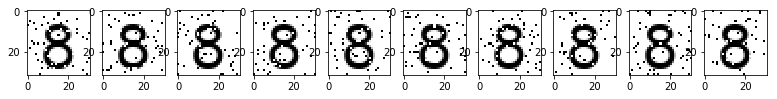

!! 8 correct=10 wrong= 0 answers=['8', '8', '8', '8', '8', '8', '8', '8', '8', '8']


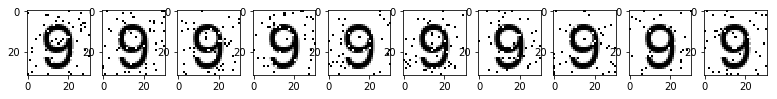

!! 9 correct=10 wrong= 0 answers=['9', '9', '9', '9', '9', '9', '9', '9', '9', '9']


In [17]:
for x in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789':
    iter_read(x, p=0.05)

## Testing with no noise

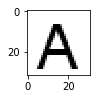

!! A correct= 1 wrong= 0 answers=['A']


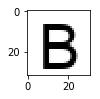

!! B correct= 1 wrong= 0 answers=['B']


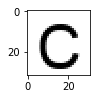

!! C correct= 1 wrong= 0 answers=['C']


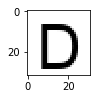

!! D correct= 1 wrong= 0 answers=['D']


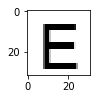

!! E correct= 1 wrong= 0 answers=['E']


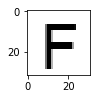

!! F correct= 1 wrong= 0 answers=['F']


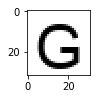

!! G correct= 1 wrong= 0 answers=['G']


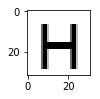

!! H correct= 1 wrong= 0 answers=['H']


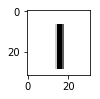

!! I correct= 1 wrong= 0 answers=['I']


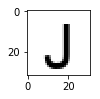

!! J correct= 1 wrong= 0 answers=['J']


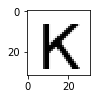

!! K correct= 1 wrong= 0 answers=['K']


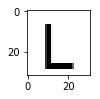

!! L correct= 1 wrong= 0 answers=['L']


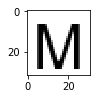

!! M correct= 1 wrong= 0 answers=['M']


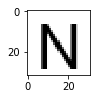

!! N correct= 1 wrong= 0 answers=['N']


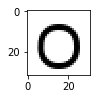

!! O correct= 1 wrong= 0 answers=['O']


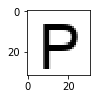

!! P correct= 1 wrong= 0 answers=['P']


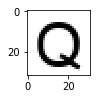

!! Q correct= 1 wrong= 0 answers=['Q']


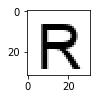

!! R correct= 1 wrong= 0 answers=['R']


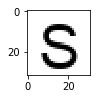

!! S correct= 1 wrong= 0 answers=['S']


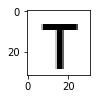

!! T correct= 1 wrong= 0 answers=['T']


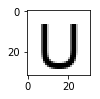

!! U correct= 1 wrong= 0 answers=['U']


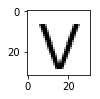

!! V correct= 1 wrong= 0 answers=['V']


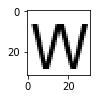

!! W correct= 1 wrong= 0 answers=['W']


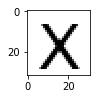

!! X correct= 1 wrong= 0 answers=['X']


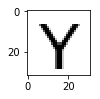

!! Y correct= 1 wrong= 0 answers=['Y']


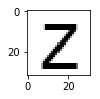

!! Z correct= 1 wrong= 0 answers=['Z']


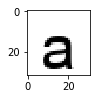

!! a correct= 1 wrong= 0 answers=['a']


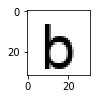

!! b correct= 0 wrong= 1 answers=['h']


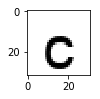

!! c correct= 1 wrong= 0 answers=['c']


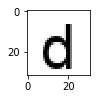

!! d correct= 1 wrong= 0 answers=['d']


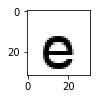

!! e correct= 1 wrong= 0 answers=['e']


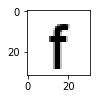

!! f correct= 1 wrong= 0 answers=['f']


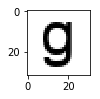

!! g correct= 1 wrong= 0 answers=['g']


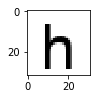

!! h correct= 1 wrong= 0 answers=['h']


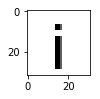

!! i correct= 1 wrong= 0 answers=['i']


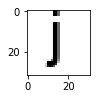

!! j correct= 1 wrong= 0 answers=['j']


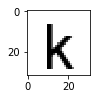

!! k correct= 1 wrong= 0 answers=['k']


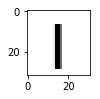

!! l correct= 1 wrong= 0 answers=['l']


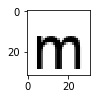

!! m correct= 1 wrong= 0 answers=['m']


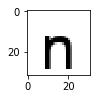

!! n correct= 1 wrong= 0 answers=['n']


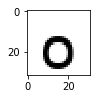

!! o correct= 1 wrong= 0 answers=['o']


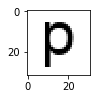

!! p correct= 1 wrong= 0 answers=['p']


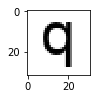

!! q correct= 1 wrong= 0 answers=['q']


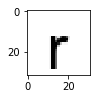

!! r correct= 1 wrong= 0 answers=['r']


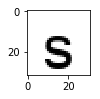

!! s correct= 1 wrong= 0 answers=['s']


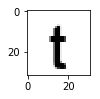

!! t correct= 1 wrong= 0 answers=['t']


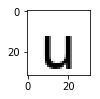

!! u correct= 1 wrong= 0 answers=['u']


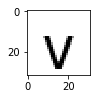

!! v correct= 1 wrong= 0 answers=['v']


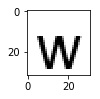

!! w correct= 1 wrong= 0 answers=['w']


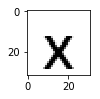

!! x correct= 1 wrong= 0 answers=['x']


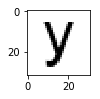

!! y correct= 1 wrong= 0 answers=['y']


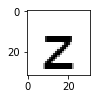

!! z correct= 1 wrong= 0 answers=['z']


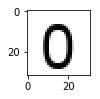

!! 0 correct= 1 wrong= 0 answers=['0']


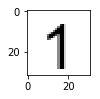

!! 1 correct= 1 wrong= 0 answers=['1']


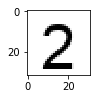

!! 2 correct= 1 wrong= 0 answers=['2']


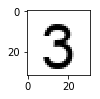

!! 3 correct= 1 wrong= 0 answers=['3']


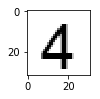

!! 4 correct= 1 wrong= 0 answers=['4']


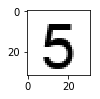

!! 5 correct= 1 wrong= 0 answers=['5']


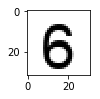

!! 6 correct= 1 wrong= 0 answers=['6']


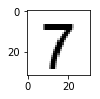

!! 7 correct= 1 wrong= 0 answers=['7']


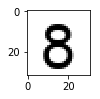

!! 8 correct= 1 wrong= 0 answers=['8']


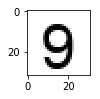

!! 9 correct= 1 wrong= 0 answers=['9']


In [18]:
for x in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789':
    iter_read(x, p=0, n=1)